# Part 0: Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [23]:
pd.set_option('display.max_columns', None)

In [211]:
# load data here
# may not use everything, reading just in case
# thanks to Tim's notebook - able to simplify the code by a lot!
file_path = 'OHIE_dta/'
des_data = pd.read_stata(file_path+'oregonhie_descriptive_vars.dta')
state_data = pd.read_stata(file_path+'oregonhie_stateprograms_vars.dta')
s0m_data = pd.read_stata(file_path+'oregonhie_survey0m_vars.dta')
s6m_data = pd.read_stata(file_path+'oregonhie_survey6m_vars.dta')
s12m_data = pd.read_stata(file_path+'oregonhie_survey12m_vars.dta')
ips_data = pd.read_stata(file_path+'oregonhie_inperson_vars.dta')
ed_data = pd.read_stata(file_path+'oregonhie_ed_vars.dta')
pat_data = pd.read_stata(file_path+'oregonhie_patterns_vars.dta')

In [212]:
des_data = des_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

In [213]:
des_data['applied_app'].replace(-1, 0, inplace=True)
des_data['approved_app'].replace(-1, 0, inplace=True)
des_data['OHIE_app_ins'] = des_data['treatment'] * des_data['applied_app'] * des_data['approved_app']
# this is my very dumb approach to keep track of who got insurance through the lottery
# may not be useful, but it is here
#des_data[:10]

In [214]:
des_data.replace(-1, np.nan, inplace=True)
des_subdata = des_data[['person_id', 'household_id', 'treatment', 'draw_lottery', 'applied_app', 'approved_app', 
                        'numhh_list', 'birthyear_list', 'have_phone_list', 'english_list', 'female_list', 
                        'first_day_list', 'last_day_list', 'pobox_list', 'self_list', 'week_list', 'zip_msa_list', 'OHIE_app_ins']]
des_subdata.loc[:,"numhh_list"] = des_subdata["numhh_list"] + 1

In [215]:
# des_subdata['OHIE_app_ins'] = des_subdata['treatment'] * des_subdata['applied_app'] * des_subdata['approved_app']
des_subdata['age'] = 2009 - des_subdata['birthyear_list']
des_subdata[:5]

/var/folders/dc/j_9rc1xd6xj5836y93540spc0000gn/T/ipykernel_18310/798873206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des_subdata['age'] = 2009 - des_subdata['birthyear_list']


,person_id,household_id,treatment,draw_lottery,applied_app,approved_app,numhh_list,birthyear_list,have_phone_list,english_list,female_list,first_day_list,last_day_list,pobox_list,self_list,week_list,zip_msa_list,OHIE_app_ins,age
0,1.0,100001.0,1,6,1,0,1,1978,1,1,0.0,0,0,1,1,1,1.0,0,31
1,2.0,100002.0,1,5,0,0,1,1984,1,1,1.0,0,0,0,1,2,1.0,0,25
2,3.0,100003.0,0,1,0,0,1,1971,1,1,1.0,0,0,0,1,2,1.0,0,38
3,4.0,100004.0,0,7,0,0,1,1955,1,1,1.0,0,0,0,1,0,1.0,0,54
4,5.0,100005.0,1,6,0,0,1,1969,1,0,1.0,0,0,0,1,1,1.0,0,40


In [216]:
state_data = state_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
state_data.replace(-1, np.nan, inplace=True)

In [15]:
# do not use!
state_vars1 = ['person_id', 'ohp_all_ever_matchn_30sep2009','ohp_all_end_30sep2009', 'ohp_all_mo_matchn_30sep2009', 
              'snap_ever_prenotify07', 'snap_ever_matchn_30sep2009', 'snap_tot_hh_prenotify07',
              'snap_tot_hh_30sep2009', 'tanf_ever_prenotify07', 'tanf_ever_matchn_30sep2009',
               'tanf_tot_hh_prenotify07', 'tanf_tot_hh_30sep2009']
state_subdata1 = pd.DataFrame(state_data[state_vars1])

In [64]:
# do not use!
state_vars2 = ['person_id', 'ohp_all_ever_firstn_30sep2009','ohp_all_end_30sep2009', 'ohp_all_mo_firstn_30sep2009',
              'snap_ever_presurvey12m', 'snap_ever_firstn_survey12m', 'snap_tot_hh_presurvey12m',
              'snap_tot_hh_firstn_survey12m', 'tanf_ever_presurvey12m', 'tanf_ever_firstn_survey12m',
               'tanf_tot_hh_presurvey12m', 'tanf_tot_hh_firstn_survey12m']
state_subdata2 = pd.DataFrame(state_data[state_vars2])

In [217]:
# want to keep all treatment vars and covariates for later robustness check
state_vars = ['person_id', 'ohp_all_ever_matchn_30sep2009','ohp_all_end_30sep2009', 'ohp_all_mo_matchn_30sep2009', 
              'snap_ever_prenotify07', 'snap_ever_matchn_30sep2009', 'snap_tot_hh_prenotify07',
              'snap_tot_hh_30sep2009', 'tanf_ever_prenotify07', 'tanf_ever_matchn_30sep2009',
              'tanf_tot_hh_prenotify07', 'tanf_tot_hh_30sep2009',
              'ohp_all_ever_firstn_30sep2009','ohp_all_end_30sep2009', 'ohp_all_mo_firstn_30sep2009',
              'snap_ever_presurvey12m', 'snap_ever_firstn_survey12m', 'snap_tot_hh_presurvey12m',
              'snap_tot_hh_firstn_survey12m', 'tanf_ever_presurvey12m', 'tanf_ever_firstn_survey12m',
               'tanf_tot_hh_presurvey12m', 'tanf_tot_hh_firstn_survey12m']
state_subdata = pd.DataFrame(state_data[state_vars])

In [18]:
# these two do have differences (albeit not sure significant)
#state_subdata['ohp_all_ever_matchn_30sep2009'].value_counts()
#NOT enrolled    56909
#Enrolled        18013
#state_subdata['ohp_all_ever_firstn_30sep2009'].value_counts() # codebook is wrong
#NOT enrolled    56563
#Enrolled        18359

# there's smth interesting going on here, but not quite sure what
# for difference firstn and matchn, see codebook
# I was going to use matchn, but then Finkelstein (2012) used firstn and I cannot find their rationale for doing so...
# so maybe do matchn (which I find it easier to justify logically), and then we can do it against firstn for robustness check??

In [218]:
# Survey 12
s12m_data = s12m_data.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)
s12m_data.replace(-1, np.nan, inplace=True)

In [219]:
s12m_data.head()

,person_id,sample_12m,dt_mail_12m,dt_returned_12m,ret_mode_12m,returned_12m,surv_lang_12m,in_survey_12m,sample_12m_resp,sample_12m_nonresp,sample_12m_nonzeroweight,weight_intensive_12m,weight_newlottery_12m,weight_12m,wave_survey12m,protocol_12m,ins_any_12m,ins_ohp_12m,ins_medicare_12m,ins_employer_12m,ins_privpay_12m,ins_othcov_12m,ins_noins_12m,ins_private_12m,ins_other_12m,ins_months_12m,usual_place_12m,usual_care_12m,usual_clinic_12m,usual_doc_12m,need_med_12m,needmet_qn_med_12m,needmet_med_12m,reason_care_cost_12m,reason_care_ins_12m,reason_care_doc_12m,reason_care_owe_12m,reason_care_apt_12m,reason_care_closed_12m,reason_care_nodoc_12m,reason_care_other_12m,reason_care_dont_12m,need_rx_12m,needmet_qn_rx_12m,needmet_rx_12m,reason_rx_cost_12m,reason_rx_ins_12m,reason_rx_doc_12m,reason_rx_get_12m,reason_rx_pharm_12m,reason_rx_other_12m,reason_rx_dont_12m,rx_any_12m,rx_num_mod_12m,need_dent_12m,needmet_qn_dent_12m,needmet_dent_12m,doc_any_12m,doc_num_mod_12m,er_any_12m,er_num_mod_12m,reason_er_need_12m,reason_er_insure_12m,reason_er_closed_12m,reason_er_apt_12m,reason_er_doc_12m,reason_er_copay_12m,reason_er_go_12m,reason_er_other_12m,reason_er_rx_12m,reason_er_dont_12m,er_noner_12m,hosp_any_12m,hosp_num_mod_12m,med_qual_12m,med_qual_bin_12m,cost_any_oop_12m,cost_doc_oop_12m,cost_er_oop_12m,cost_rx_oop_12m,cost_oth_oop_12m,cost_tot_oop_12m,cost_any_owe_12m,cost_tot_owe_12m,cost_borrow_12m,cost_refused_12m,happiness_12m,health_gen_12m,health_gen_bin_12m,health_chg_12m,health_chg_bin_12m,baddays_phys_12m,baddays_ment_12m,baddays_tot_12m,health_work_12m,physical_act_12m,dep_interest_12m,dep_sad_12m,dia_dx_12m,ast_dx_12m,hbp_dx_12m,emp_dx_12m,ami_dx_12m,chf_dx_12m,dep_dx_12m,chl_dx_12m,kid_dx_12m,dia_rx_12m,ast_rx_12m,hbp_rx_12m,emp_rx_12m,ami_rx_12m,chf_rx_12m,dep_rx_12m,chl_rx_12m,kid_rx_12m,chl_chk_12m,dia_chk_12m,mam_chk_12m,pap_chk_12m,smk_ever_12m,smk_curr_12m,smk_avg_mod_12m,smk_quit_12m,female_12m,birthyear_12m,employ_12m,employ_det_12m,employ_hrs_12m,hhinc_cat_12m,hhinc_pctfpl_12m,race_hisp_12m,race_white_12m,race_black_12m,race_amerindian_12m,race_asian_12m,race_pacific_12m,race_other_qn_12m,edu_12m,live_partner_12m,live_alone_12m,live_parents_12m,live_relatives_12m,live_friends_12m,live_other_12m,hhsize_12m,num19_12m,needmet_med_cor_12m,needmet_rx_cor_12m,needmet_dent_cor_12m
0,1.0,1,5.0,2009-11-24,Mail,1.0,English,1.0,1,0,1,1.0,1.000000,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,1.0,0.0,15.0,30.0,20.0,0.0,2.0,3.0,3.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,1.0,2.0,0.0,NaN,0.0,1978.0,0.0,2.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
1,2.0,1,5.0,2009-08-31,Mail,1.0,English,1.0,1,0,1,1.0,1.000000,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,2.0,0.0,1.0,0.0,3.0,12.0,6.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,NaN,1.0,1984.0,1.0,0.0,2.0,4.0,60.054909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
2,3.0,1,3.0,NaT,,0.0,,0.0,0,0,0,0.0,1.046526,0.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [220]:
data12m = pd.merge(des_subdata, state_subdata, on='person_id', how='left')

In [221]:
data12m = pd.merge(data12m, s12m_data, on='person_id', how='left')

In [31]:
#data12m.head(10)

In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [222]:
fdata12m = data12m.filter(regex='^(?!.*_y$)')
fdata12m = fdata12m.rename(lambda x: x.replace('_x', ''), axis=1)
fdata12m = fdata12m.apply(lambda x: pd.to_numeric(x, errors='coerce') if x.dtype == 'object' else x)
datetime_columns = fdata12m.select_dtypes('datetime64[ns]').columns
ordinal_encoder = OrdinalEncoder()
fdata12m[datetime_columns] = ordinal_encoder.fit_transform(fdata12m[datetime_columns])

In [223]:
fdata12m['returned_12m']

0        1.0
1        1.0
2        0.0
3        NaN
4        1.0
        ... 
74917    NaN
74918    0.0
74919    NaN
74920    1.0
74921    0.0
Name: returned_12m, Length: 74922, dtype: float64

In [35]:
#fdata12m.columns.tolist()

In [224]:
f12m_resp_data = fdata12m[fdata12m['returned_12m'] == 1]
#f12m_resp_data.dtypes.tolist()

In [225]:
f12m_rest_data = fdata12m[fdata12m['returned_12m'] == 0]
#f12m_rest_data.describe()

In [226]:
#f12m_resp_data['weight_12m'].value_counts()
# want to exclude the 36 person Finkelstein et al addressed
f12m_resp_data = f12m_resp_data[f12m_resp_data['weight_12m'] != 0]

In [41]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV

In [227]:
# I am seriously thinking we need CV for justification, but GridSearchCV doesn't work on things without score function
# so I am sticking to k = 5 for now
# imputing for item-nonresponse
imputer = KNNImputer(n_neighbors=5)
f12m_resp_imp_data = imputer.fit_transform(f12m_resp_data)

I am working on the justification but the idea is that we no longer need to worry about item non-response and can just focus on attrition.

In [228]:
f12m_resp_imp_copy = f12m_resp_imp_data # save a copy just in case I accidentally re-run the above

In [270]:
#f12m_resp_imp_data = f12m_resp_imp_copy
#f12m_resp_imp_data

In [229]:
f12m_resp_imp_data = pd.DataFrame(f12m_resp_imp_data, columns=imputer.get_feature_names_out())
#f12m_resp_imp_data.columns.tolist()

In [230]:
set1 = set(imputer.get_feature_names_out())
set2 = set(f12m_resp_data.columns)

set2 - set1
# {'ret_mode_12m', 'surv_lang_12m'}
# Idk what the heck the imputer did, but these two variables don't concern us too much so I am willing to let go

{'ret_mode_12m', 'surv_lang_12m'}

In [231]:
f12m_rest_data.drop(columns=['ret_mode_12m', 'surv_lang_12m'], inplace=True)

/var/folders/dc/j_9rc1xd6xj5836y93540spc0000gn/T/ipykernel_18310/9085027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f12m_rest_data.drop(columns=['ret_mode_12m', 'surv_lang_12m'], inplace=True)


In [232]:
f12m_imp_data = pd.concat([f12m_resp_imp_data, f12m_rest_data], ignore_index=True)

In [233]:
f12m_imp_data.head()
# looks fine but need to be extra careful about which values are imputed from now on

,person_id,household_id,treatment,draw_lottery,applied_app,approved_app,numhh_list,birthyear_list,have_phone_list,english_list,female_list,first_day_list,last_day_list,pobox_list,self_list,week_list,zip_msa_list,OHIE_app_ins,age,ohp_all_ever_matchn_30sep2009,ohp_all_end_30sep2009,ohp_all_mo_matchn_30sep2009,snap_ever_prenotify07,snap_ever_matchn_30sep2009,snap_tot_hh_prenotify07,snap_tot_hh_30sep2009,tanf_ever_prenotify07,tanf_ever_matchn_30sep2009,tanf_tot_hh_prenotify07,tanf_tot_hh_30sep2009,ohp_all_ever_firstn_30sep2009,ohp_all_end_30sep2009,ohp_all_mo_firstn_30sep2009,snap_ever_presurvey12m,snap_ever_firstn_survey12m,snap_tot_hh_presurvey12m,snap_tot_hh_firstn_survey12m,tanf_ever_presurvey12m,tanf_ever_firstn_survey12m,tanf_tot_hh_presurvey12m,tanf_tot_hh_firstn_survey12m,sample_12m,dt_mail_12m,dt_returned_12m,returned_12m,in_survey_12m,sample_12m_resp,sample_12m_nonresp,sample_12m_nonzeroweight,weight_intensive_12m,weight_newlottery_12m,weight_12m,wave_survey12m,protocol_12m,ins_any_12m,ins_ohp_12m,ins_medicare_12m,ins_employer_12m,ins_privpay_12m,ins_othcov_12m,ins_noins_12m,ins_private_12m,ins_other_12m,ins_months_12m,usual_place_12m,usual_care_12m,usual_clinic_12m,usual_doc_12m,need_med_12m,needmet_qn_med_12m,needmet_med_12m,reason_care_cost_12m,reason_care_ins_12m,reason_care_doc_12m,reason_care_owe_12m,reason_care_apt_12m,reason_care_closed_12m,reason_care_nodoc_12m,reason_care_other_12m,reason_care_dont_12m,need_rx_12m,needmet_qn_rx_12m,needmet_rx_12m,reason_rx_cost_12m,reason_rx_ins_12m,reason_rx_doc_12m,reason_rx_get_12m,reason_rx_pharm_12m,reason_rx_other_12m,reason_rx_dont_12m,rx_any_12m,rx_num_mod_12m,need_dent_12m,needmet_qn_dent_12m,needmet_dent_12m,doc_any_12m,doc_num_mod_12m,er_any_12m,er_num_mod_12m,reason_er_need_12m,reason_er_insure_12m,reason_er_closed_12m,reason_er_apt_12m,reason_er_doc_12m,reason_er_copay_12m,reason_er_go_12m,reason_er_other_12m,reason_er_rx_12m,reason_er_dont_12m,er_noner_12m,hosp_any_12m,hosp_num_mod_12m,med_qual_12m,med_qual_bin_12m,cost_any_oop_12m,cost_doc_oop_12m,cost_er_oop_12m,cost_rx_oop_12m,cost_oth_oop_12m,cost_tot_oop_12m,cost_any_owe_12m,cost_tot_owe_12m,cost_borrow_12m,cost_refused_12m,happiness_12m,health_gen_12m,health_gen_bin_12m,health_chg_12m,health_chg_bin_12m,baddays_phys_12m,baddays_ment_12m,baddays_tot_12m,health_work_12m,physical_act_12m,dep_interest_12m,dep_sad_12m,dia_dx_12m,ast_dx_12m,hbp_dx_12m,emp_dx_12m,ami_dx_12m,chf_dx_12m,dep_dx_12m,chl_dx_12m,kid_dx_12m,dia_rx_12m,ast_rx_12m,hbp_rx_12m,emp_rx_12m,ami_rx_12m,chf_rx_12m,dep_rx_12m,chl_rx_12m,kid_rx_12m,chl_chk_12m,dia_chk_12m,mam_chk_12m,pap_chk_12m,smk_ever_12m,smk_curr_12m,smk_avg_mod_12m,smk_quit_12m,female_12m,birthyear_12m,employ_12m,employ_det_12m,employ_hrs_12m,hhinc_cat_12m,hhinc_pctfpl_12m,race_hisp_12m,race_white_12m,race_black_12m,race_amerindian_12m,race_asian_12m,race_pacific_12m,race_other_qn_12m,edu_12m,live_partner_12m,live_alone_12m,live_parents_12m,live_relatives_12m,live_friends_12m,live_other_12m,hhsize_12m,num19_12m,needmet_med_cor_12m,needmet_rx_cor_12m,needmet_dent_cor_12m
0,1.0,100001.0,1.0,6.0,1.0,0.0,1.0,1978.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,31.0,0.0,0.0,0.0,1.0,1.0,7453.0,746.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5575.0,2624.0,0.0,0.0,0.0,0.0,1.0,5.0,132.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.6,3.2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.4,0.8,0.2,0.2,0.4,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,1.0,0.0,15.0,30.0,20.0,0.0,2.0,3.0,3.0,0.0,1.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.4,1.0,1.0,2.0,0.0,0.4,0.0,1978.0,0.0,2.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
1,2.0,100002.0,1.0,5.0,0.0,0.0,1.0,1984.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,25.0,1.0,0.0,8.0,1.0,1.0,2404.0,3962.0,0.0,0.0,0.0,0.0,1

In [234]:
csv_file_path = 'OHIE/imp_data_12m_v4.csv'
f12m_imp_data.to_csv(csv_file_path, index=False)

# LATE accounting for NA's Using DML
## Part 1: Motivation

Quotes from Finkelstein et al. (2012):

"The survey data allow examination of a much richer set of outcomes than is feasible with administrative data alone, but with a 50% effective response rate, are subject to potential nonresponse bias. Our available evidence on this issue is limited but reasonably reassuring." (Introduction)

"These outcomes are only available for individuals who responded to the mail survey and may therefore not be representative of the full sample." (Data)

"We use the fairly conservative procedure of Lee (2009) to bound the potential bias arising from differential response rates between treatments and controls." (Remark 19)

**What if we can directly address this non-response bias through machine learning?**

**Idea**: Use approach proposed in Lecture 14-15 1.5.1 Missing Values and Homework 4. This notebook will be focused on investigating that.

**Challenge #1**: for most of the outcome variables, we are dealing with item non-response (when responder fails to answer one particular item on the survey) and unit non-response (when the unit fails to respond to the survey as a whole). I don't see a good way to justify this, but by economic intuition, these are two very different kinds of non-response and sometimes can even work against each other (for instance, when a participant is unwilling to disclose the number of prescription drug he/she takes but agrees to take the survey exactly due to financial incentives). I propose focusing on unit non-response and control for item non-response using KNN. The imputation has already been done in part 0.

*I don't have a good justification for using KNN as opposed to some other methodologies except for computational convenience - since KNNImputer automatically imputes the entire table, and I am not aware of similar functions in other methods. I think it is okay to brush through it in the presentation, but I don't know if we can get away with it in the paper.*

In this subsection, I will run the imputed data on the baseline controls stated in Finkelstein et al. (2012), i.e. household size indicators, survey wave indicators, and their interactions, using random forest (which is the same as 2SLS because the regression is saturated). Ideally the estimates obtained should be similar to the estimates in the original paper, otherwise we will have to justify the bias introduced by item non-response.

### TODO 1: run 2SLS/random forest on the imputed data to estimate LATE and compare with Finkelstein - done
### TODO 1.5: repeat for k = 10 and k = 20, see if that makes a difference - done

This is robustness check for difference caused by controlling for item non-response.

*Update 03/07: I also just realized that Finkelstein et al has unweighted estimates (Online Appendix Table A15). We should use that for comparison if we do not want to use weight_12m.*

Argument for using random forest here (versus 2SLS) is that it results in smaller standard errors.

*Update 03/07: I tried using RF but parameter selection through CV is taking way too long. In the interest of time I will use 2SLS as a placeholder and come back later if we have extra time.*

Argument for using 2SLS: better comparison with Finkelstein, which is kind of the main point of this section.

In [294]:
# D = ohp_all_ever_matchn_30sep2009
# Z = treatment
# now make sure X (controls) and Y (outcome) are okay

In [235]:
# Convert columns to factors
f12m_imp_data['numhh_ori'] = f12m_imp_data['numhh_list']
f12m_imp_data = pd.get_dummies(f12m_imp_data, columns=['numhh_list'], drop_first=False)

f12m_imp_data['wave_ori'] = f12m_imp_data['wave_survey12m']
f12m_imp_data = pd.get_dummies(f12m_imp_data, columns=['wave_survey12m'], drop_first=False)

f12m_imp_data['numhh_wave_intcat'] = pd.Categorical(f12m_imp_data['numhh_ori'].astype(str) + ':' + f12m_imp_data['wave_ori'].astype(str))
f12m_imp_data['numhh_wave_intori'] = f12m_imp_data['numhh_wave_intcat']
f12m_imp_data = pd.get_dummies(f12m_imp_data, columns=['numhh_wave_intcat'], drop_first=False)

In [362]:
#f12m_imp_data['dep_interest_12m'].value_counts()
f12m_imp_data.loc[:,'dep_score'] = f12m_imp_data.loc[:,'dep_interest_12m'] + f12m_imp_data.loc[:,'dep_sad_12m']
f12m_imp_data.loc[:,'dep_indc'] = f12m_imp_data.loc[:,'dep_score'] >= 3.0
f12m_imp_data.loc[:,'neg_dep_indc'] = - f12m_imp_data.loc[:,'dep_indc'] 

In [363]:
#f12m_imp_data['er_noner_12m'].value_counts()
f12m_imp_data.loc[:,'neg_health_gen_bin_12m'] = 1 - f12m_imp_data.loc[:,'health_gen_bin_12m']
f12m_imp_data.loc[:,'neg_health_chg_bin_12m'] = 1 - f12m_imp_data.loc[:,'health_chg_bin_12m']
f12m_imp_data.loc[:,'gooddays_phys_12m'] = 30 - f12m_imp_data.loc[:,'baddays_phys_12m']
f12m_imp_data.loc[:,'gooddays_ment_12m'] = 30 - f12m_imp_data.loc[:,'baddays_ment_12m']
f12m_imp_data.loc[:,'neg_health_work_12m'] = 1 - f12m_imp_data.loc[:,'health_work_12m']

f12m_imp_data.loc[:,'ner_noner_12m'] = 1 - f12m_imp_data.loc[:,'er_noner_12m']

In [364]:
f12m_y_imp_data = f12m_imp_data[f12m_imp_data['returned_12m'] == 1]
f12m_n_imp_data = f12m_imp_data[f12m_imp_data['returned_12m'] == 0]

In [56]:
# 1st group: Health Care Utilization
#pip install doubleml
import doubleml as dml
from doubleml.datasets import make_iivm_data
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [238]:
# manually scale indicator outcomes because imputation resulted in non 0 or 1 results
# in some sense I think that the imputed results might be more accurate (as they indicate the probability)
# but that changes the nature of the outcome so ...
col_adj = ['rx_any_12m', 'doc_any_12m', 'er_any_12m', 'hosp_any_12m', 'cost_any_oop_12m', 'cost_any_owe_12m',
           'cost_borrow_12m', 'cost_refused_12m', 'health_gen_bin_12m',  'health_chg_bin_12m', 'health_work_12m']

for col in col_adj:
    new_col = col + '_adj'
    f12m_y_imp_data.loc[:,new_col] = f12m_y_imp_data.loc[:,col].apply(lambda x: 1.0 if x >= 0.5 else 0.0)

In [75]:
#f12m_y_imp_data.head()

In [240]:
for col in col_adj:
    new_col = col + '_adj'
    f12m_n_imp_data.loc[:,new_col] = np.nan

In [88]:
#f12m_n_imp_data.columns.tolist()

In [241]:
col_new = [col + '_adj' for col in col_adj]
#col_new

In [64]:
#f12m_y_imp_data.columns.tolist()

In [242]:
controls = ['numhh_list_1.0', 'numhh_list_2.0', 'numhh_list_3.0',
            'wave_survey12m_0.0', 'wave_survey12m_1.0', 'wave_survey12m_2.0', 'wave_survey12m_3.0',
            'wave_survey12m_4.0', 'wave_survey12m_5.0', 'wave_survey12m_6.0',
            'numhh_wave_intcat_1.0:0.0', 'numhh_wave_intcat_1.0:1.0', 'numhh_wave_intcat_1.0:2.0',
            'numhh_wave_intcat_1.0:3.0', 'numhh_wave_intcat_1.0:4.0', 'numhh_wave_intcat_1.0:5.0',
            'numhh_wave_intcat_1.0:6.0', 'numhh_wave_intcat_2.0:0.0', 'numhh_wave_intcat_2.0:1.0',
            'numhh_wave_intcat_2.0:2.0', 'numhh_wave_intcat_2.0:3.0', 'numhh_wave_intcat_2.0:4.0',
            'numhh_wave_intcat_2.0:5.0', 'numhh_wave_intcat_2.0:6.0', 'numhh_wave_intcat_3.0:0.0',
            'numhh_wave_intcat_3.0:1.0', 'numhh_wave_intcat_3.0:2.0']

In [243]:
# test run on one 2SLS
rx_any_vars = controls + ['ohp_all_ever_matchn_30sep2009', 'treatment', 'rx_any_12m']
rx_any_data = f12m_y_imp_data[rx_any_vars]

In [108]:
#pip install linearmodels

In [111]:
from linearmodels.iv import IV2SLS
from statsmodels.api import add_constant

In [365]:
f12m_y_imp_data = add_constant(f12m_y_imp_data, has_constant="add")

In [245]:
first_stage = IV2SLS(f12m_y_imp_data.ohp_all_ever_matchn_30sep2009, 
                     f12m_y_imp_data[["const", "treatment"]], None, None).fit(
    cov_type="robust"
)
print(first_stage)
# compared to constant = 0.026	    coeff = 0.302 (SE = 0.0055)

                                  OLS Estimation Summary                                 
Dep. Variable:     ohp_all_ever_matchn_30sep2009   R-squared:                      0.1094
Estimator:                                   OLS   Adj. R-squared:                 0.1093
No. Observations:                          23741   F-statistic:                    2903.6
Date:                           Thu, Mar 07 2024   P-value (F-stat)                0.0000
Time:                                   20:18:42   Distribution:                  chi2(1)
Cov. Estimator:                           robust                                         
                                                                                         
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          0.1296     0.0031     42.160

In [257]:
temp = pd.DataFrame()
temp1 = pd.DataFrame(first_stage.params).T
temp2 = pd.DataFrame(first_stage.std_errors).T
# pd.concat([first_stage.params, first_stage.std_errors], axis = 1)

first_stage_res = pd.concat([first_stage.params, first_stage.std_errors], axis=0).to_frame().T
temp = pd.concat([temp, first_stage_res], ignore_index=True)
temp
# doesn't differ much from Finkelstein's estimates
#  0.135	    0.290	   (0.0066)

,const,treatment,const,treatment
0,0.12964,0.295918,0.003075,0.005492


In [258]:
second_stage = IV2SLS(f12m_y_imp_data.rx_any_12m, f12m_y_imp_data[["const"]], 
                      f12m_y_imp_data.ohp_all_ever_matchn_30sep2009, f12m_y_imp_data.treatment).fit(
    cov_type="robust"
)
print(second_stage)

                          IV-2SLS Estimation Summary                          
Dep. Variable:             rx_any_12m   R-squared:                      0.0025
Estimator:                    IV-2SLS   Adj. R-squared:                 0.0025
No. Observations:               23741   F-statistic:                    0.3577
Date:                Thu, Mar 07 2024   P-value (F-stat)                0.5498
Time:                        21:52:52   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                                       Parameter Estimates                                       
                               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------------------
const                             0.6388     0.0060     106.98     0.0000 

In [372]:
outcome1 = ['rx_any_12m', 'rx_num_mod_12m', 'doc_any_12m', 'doc_num_mod_12m', 
             'er_any_12m', 'er_num_mod_12m', 'hosp_any_12m' , 'hosp_num_mod_12m']

outcome2 = ['cost_any_oop_12m', 'cost_any_owe_12m', 'cost_borrow_12m', 'cost_refused_12m'] 
# 'cost_tot_oop_12m''cost_tot_owe_12m', 

outcome3 = ['neg_health_gen_bin_12m', 'neg_health_chg_bin_12m', 'gooddays_phys_12m','gooddays_ment_12m',
            'neg_health_work_12m', 'neg_dep_indc'] 

outcome4 = ['usual_clinic_12m', 'usual_doc_12m', 'needmet_med_12m', 'needmet_rx_12m', 
            'ner_noner_12m', 'med_qual_bin_12m', 'happiness_12m'] 

outcomes = outcome1 + outcome2 + outcome3 + outcome4

In [373]:
col_all = outcomes + col_new

In [374]:
item_df = pd.DataFrame()

for col in col_all:
    reg_2sls = IV2SLS(f12m_y_imp_data[[col]], f12m_y_imp_data[["const"]], 
                      f12m_y_imp_data.ohp_all_ever_matchn_30sep2009, f12m_y_imp_data.treatment,
                     weights = f12m_y_imp_data.weight_12m).fit(
    cov_type="robust"
    )

    temp = pd.concat([reg_2sls.params, reg_2sls.std_errors], axis=0).to_frame().T
    item_df = pd.concat([item_df, temp], ignore_index=True)

item_df.columns = ['const coeff', 'ins coeff', 'const SE', 'ins SE'] 

#citem_df = pd.concat([pd.DataFrame(col_all), item_df], axis=1)
#citem_df

In [375]:
citem_df = pd.concat([pd.DataFrame(col_all), item_df], axis=1)
citem_df

,0,const coeff,ins coeff,const SE,ins SE
0,rx_any_12m,0.633023,0.022523,0.006794,0.021767
1,rx_num_mod_12m,2.299318,0.041829,0.040954,0.131496
2,doc_any_12m,0.550255,0.187196,0.007505,0.023827
3,doc_num_mod_12m,1.794398,0.908646,0.052369,0.172947
4,er_any_12m,0.261331,-0.002361,0.006841,0.021934
5,er_num_mod_12m,0.473731,-0.028333,0.016675,0.052712
6,hosp_any_12m,0.072076,0.000703,0.004055,0.012908
7,hosp_num_mod_12m,0.095350,0.014712,0.006232,0.020311
8,cost_any_oop_12m,0.580067,-0.203969,0.007678,0.024547
9,cost_any_owe_12m,0.622728,-0.201253,0.007602,0.024592


Some of these estimates, especially the ones in the first set of outcomes (health utilization) worry me, as they do not really overlap with Finkelstein's estimates (standard errors and CI accounted for). The others I am less worried about. 

In addition, I imputed data with $k = 10$ and $k = 20$ in 2 other notebooks (I won't upload them because it's the exact same code), and the differences between the 2SLS estimates are minimal (negligible). This shows that our results are more or less robust to different imputations and already partially compensate for the non-response bias. I am wondering if it would be a good idea to put all the estimates in the Appendix to show that.

In [361]:
f12m_y_imp_data.drop(columns=['const'], inplace=True)

In [285]:
f12m_imp_data = pd.concat([f12m_y_imp_data, f12m_n_imp_data], ignore_index=True)

## Part 2: Justification

It is easy to see intuitively that many factors can influence both health and financial outcomes and response rate - age, gender, socioeconomic status, etc. - not to mention that the basic versus intensive protocols also introduced some variation.

First, we want to show that this unit non-response bias is correlated with some observed characteristics. We begin the exploration with correlation heatmaps. Note that correlation plots are not entirely valid because they only show marginal relations (instead of joint), but it is a good starting point to gauge which variables are potentially important.

*Update 02/29: prof and TA think it's good to include graphs for certain covariates to show imbalance.*

*Update 03/07: feedback from presentation: want to think carefully about every single variable added to $X$. So thoughts: make sure at least have marginal correlation through grapsh - make sure variable is important in random forest feature selection - check if already selected X's are strongly correlated between themselves - make sure the two estimates obtained using propensity score are not too different in the next section (as robustness check)*

In [5]:
# need to read again because my computer crashed
#file_path = 'OHIE/'
#sdata12m = pd.read_csv(file_path+'s12m_data.csv')

In [297]:
#f12m_imp_data.columns.tolist()

In [286]:
f12m_imp_corr1 = f12m_imp_data[['returned_12m', 
          'numhh_list_1.0', 'numhh_list_2.0', 'numhh_list_3.0',
          'wave_survey12m_0.0', 'wave_survey12m_1.0', 'wave_survey12m_2.0', 
          'wave_survey12m_3.0', 'wave_survey12m_4.0', 'wave_survey12m_5.0', 'wave_survey12m_6.0',
          'protocol_12m', 'weight_12m']]

In [287]:
f12m_imp_corr1.corr().iloc[0, :]
# f12m_imp_corr1.corr().iloc[12, :] 
# protocol_12m and weight_intensive_12m are highly correlated

returned_12m          1.000000
numhh_list_1.0       -0.013572
numhh_list_2.0        0.013998
numhh_list_3.0       -0.003419
wave_survey12m_0.0    0.007700
wave_survey12m_1.0    0.004098
wave_survey12m_2.0    0.002578
wave_survey12m_3.0    0.001080
wave_survey12m_4.0    0.000995
wave_survey12m_5.0   -0.013629
wave_survey12m_6.0    0.000816
protocol_12m         -0.204738
weight_12m            0.172724
Name: returned_12m, dtype: float64

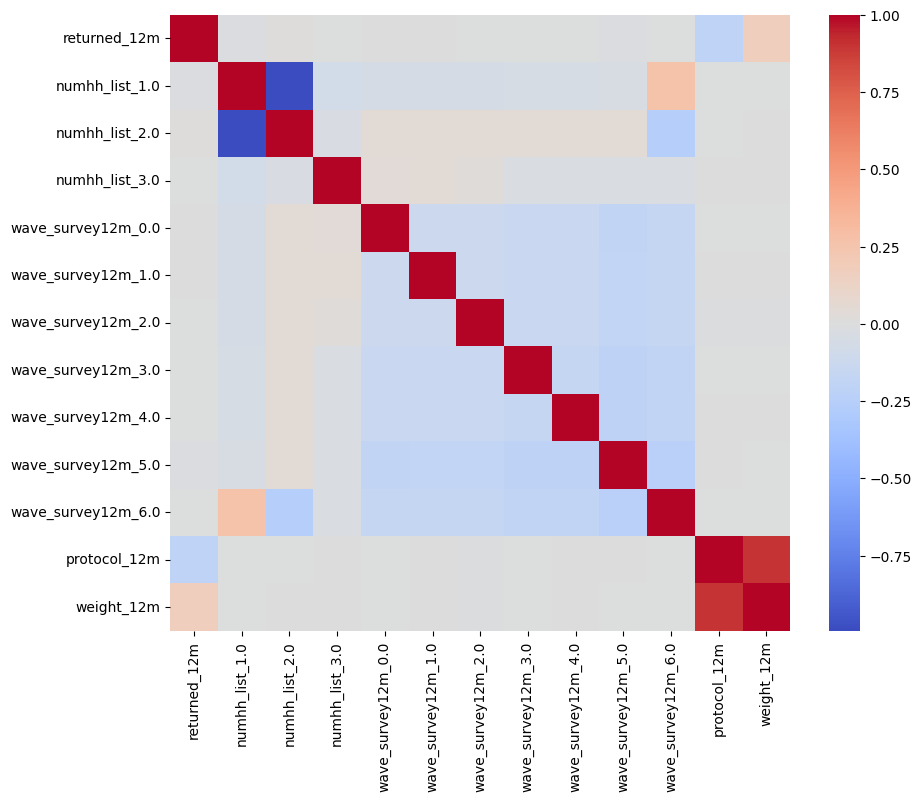

In [272]:
corr1_mat = f12m_imp_corr1.corr() #.iloc[0, :]
# focus on the first row / col

plt.figure(figsize = (10,8))
sns.heatmap(corr1_mat, cmap='coolwarm')
plt.show()
# note protocol_12m and weight_12m

In [267]:
from matplotlib.pyplot import figure

### TODO 2: double check Finkelstein paper to see what $X$ they are using (i.e. is X just protocol intensity) - done

Answer: $X$ is the product of two inverse propensity scores they generated: one from probability of being intensively followed-up and the second from being included in a new round of lottery. Protocol selection can be directly observed through another variable ('protocol_12m') but not inclusion on the new list. So maybe we include both in $X$ to control for that?

In [291]:
f12m_imp_data['returned_12m_int'] = f12m_imp_data['returned_12m'].astype(int)

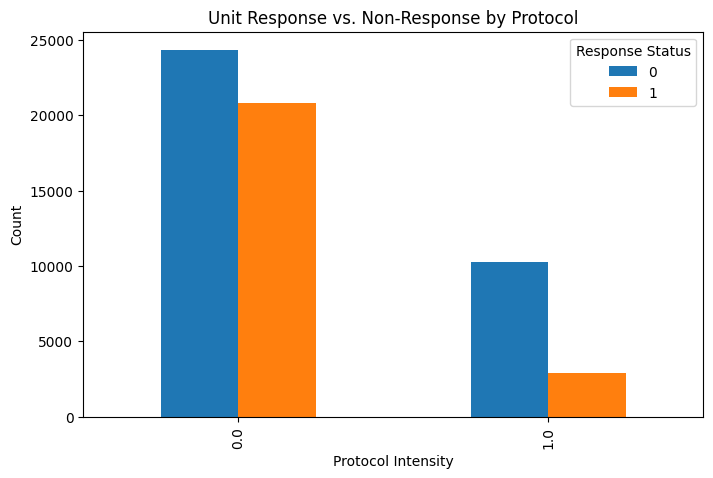

In [292]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,5)
pd.crosstab(f12m_imp_data.protocol_12m,f12m_imp_data.returned_12m_int).plot(kind='bar')
plt.title('Unit Response vs. Non-Response by Protocol')
plt.xlabel('Protocol Intensity')
plt.ylabel('Count')

legend = plt.legend()
legend.set_title('Response Status')

plt.savefig('just_protocol')

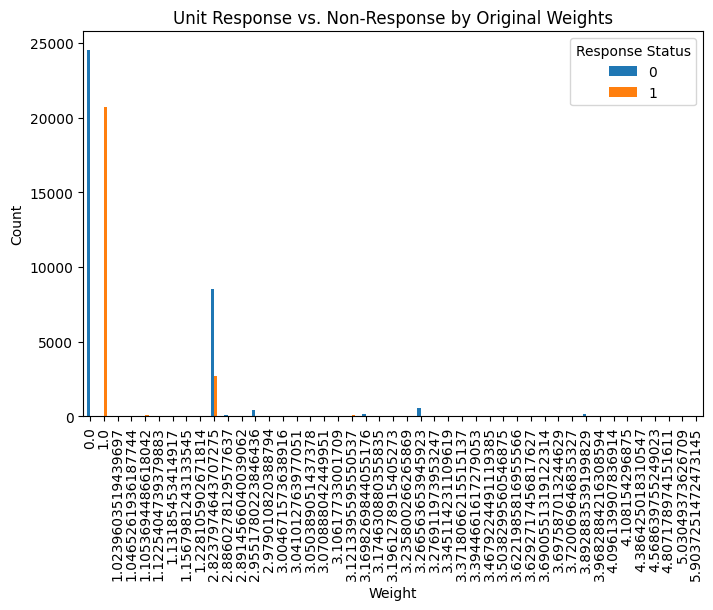

In [293]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,5)
pd.crosstab(f12m_imp_data.weight_12m,f12m_imp_data.returned_12m_int).plot(kind='bar')
plt.title('Unit Response vs. Non-Response by Original Weights')
plt.xlabel('Weight')
plt.ylabel('Count')

legend = plt.legend()
legend.set_title('Response Status')

plt.savefig('just_weight')
# maybe don't put this graph lol

In [303]:
#f12m_imp_data['age'] = 2009 - f12m_imp_data['birthyear_list']

In [288]:
f12m_imp_corr2 = f12m_imp_data[['returned_12m', 'age', 'have_phone_list', 'english_list', 'female_list', 
                                'first_day_list', 'last_day_list', 'pobox_list', 'self_list', 'week_list',
                                'zip_msa_list', 'OHIE_app_ins']]

In [279]:
f12m_imp_corr2.corr().iloc[0, :]

returned_12m       1.000000
age                0.163303
have_phone_list    0.075007
english_list       0.025519
female_list        0.075366
first_day_list     0.030017
last_day_list     -0.027695
pobox_list         0.024307
self_list          0.007338
week_list         -0.048347
zip_msa_list      -0.035106
OHIE_app_ins       0.049096
Name: returned_12m, dtype: float64

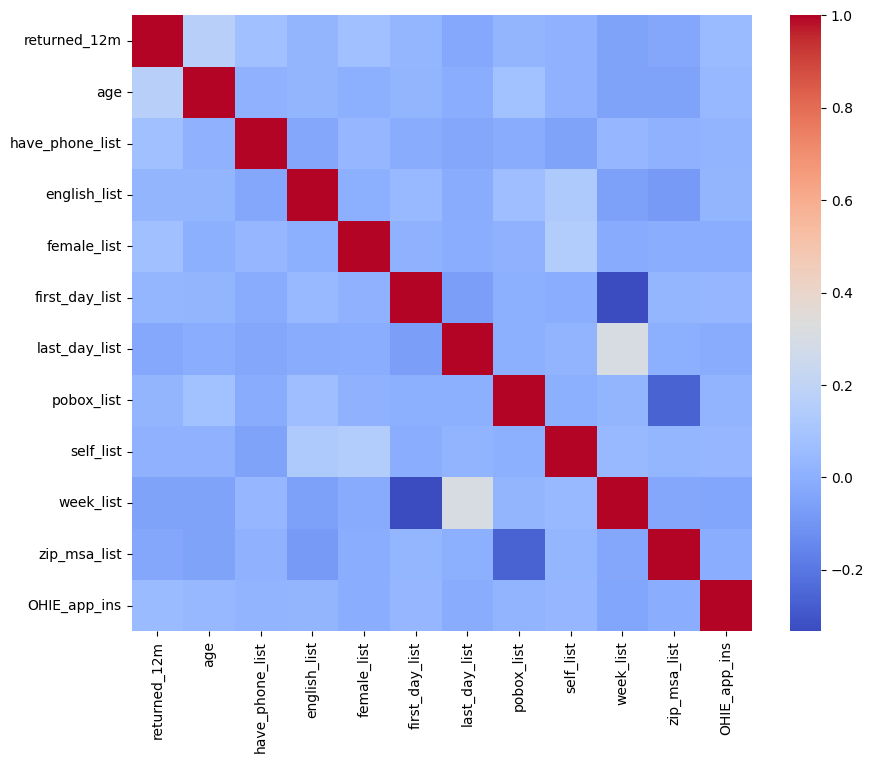

In [289]:
corr2_mat = f12m_imp_corr2.corr() #.iloc[0, :]
# focus on the first row / col

plt.figure(figsize = (10,8))
sns.heatmap(corr2_mat, cmap='coolwarm')
plt.show()
# note age

In [294]:
f12m_imp_data['age_int'] = f12m_imp_data['age'].astype(int)

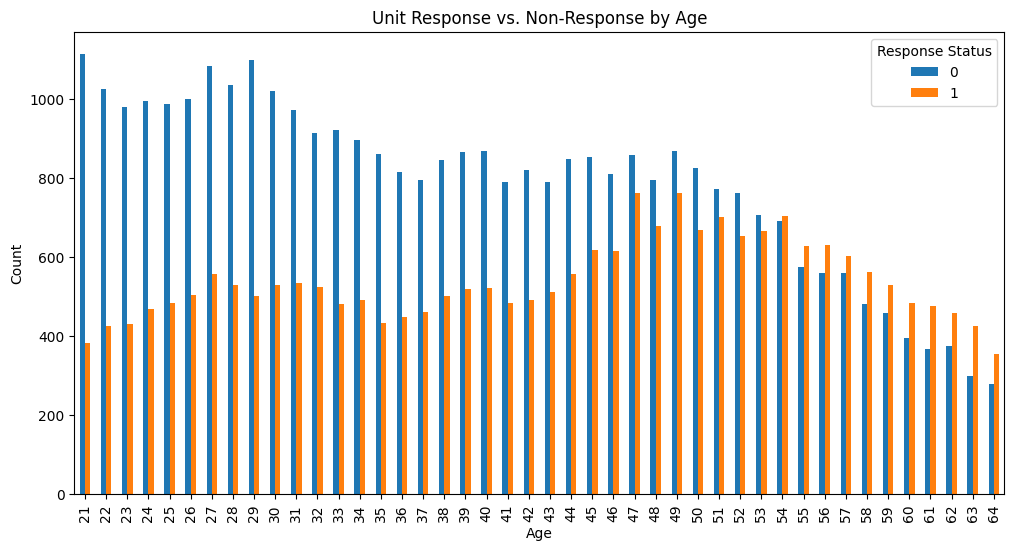

In [295]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)
#plt.figure(figsize = (12,8))
pd.crosstab(f12m_imp_data.age_int,f12m_imp_data.returned_12m_int).plot(kind='bar')
plt.title('Unit Response vs. Non-Response by Age')
plt.xlabel('Age')
plt.ylabel('Count')

legend = plt.legend()
legend.set_title('Response Status')

plt.savefig('just_age')

In [296]:
f12m_imp_corr3 = f12m_imp_data[['returned_12m', 'snap_ever_prenotify07', 'snap_ever_matchn_30sep2009',
                                'snap_tot_hh_prenotify07', 'snap_tot_hh_30sep2009', 'tanf_ever_prenotify07',
                                'tanf_ever_matchn_30sep2009','tanf_tot_hh_prenotify07','tanf_tot_hh_30sep2009']]

In [297]:
f12m_imp_corr3.corr().iloc[0, :]

returned_12m                  1.000000
snap_ever_prenotify07        -0.018120
snap_ever_matchn_30sep2009    0.007340
snap_tot_hh_prenotify07      -0.021602
snap_tot_hh_30sep2009         0.003393
tanf_ever_prenotify07        -0.036117
tanf_ever_matchn_30sep2009   -0.042775
tanf_tot_hh_prenotify07      -0.025268
tanf_tot_hh_30sep2009        -0.037154
Name: returned_12m, dtype: float64

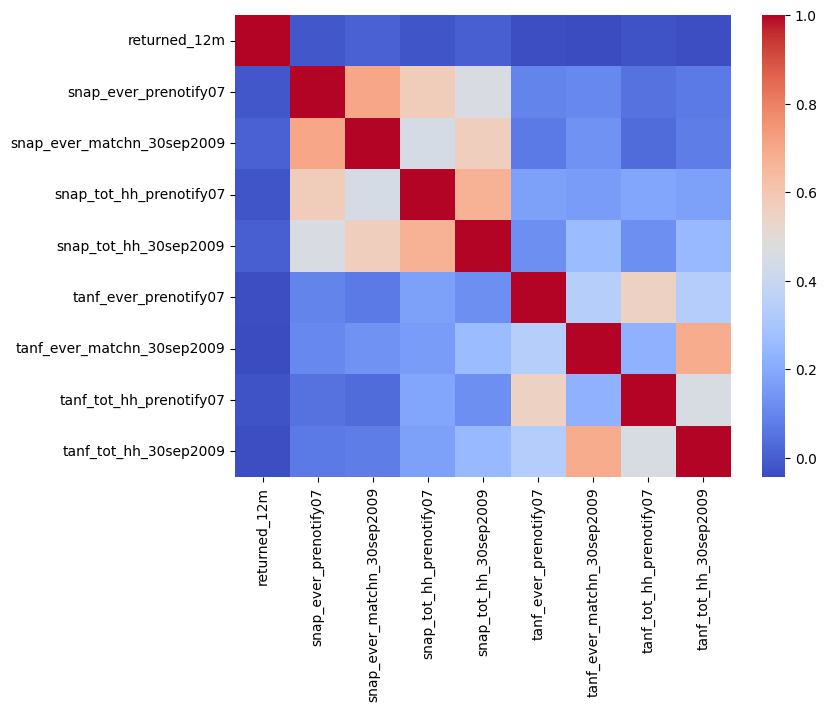

In [345]:
corr3_mat = f12m_imp_corr3.corr() #.iloc[0, :]
# focus on the first row / col

plt.figure(figsize = (8,6))
sns.heatmap(corr3_mat, cmap='coolwarm')
plt.show()
# nothing too significant here but we will see

The above procedure gives us three potential variables: protocol_12m, weight_12m and age.

How to identify confounding variables under a joint distribution setting? TA said that there is no good (standard) way to test for it without time. I propose this (which may or may not work): we run a random forest, which does automatic feature selection. Then we select the top few variables (i.e. those seem to predict missing values status well, thus high correlation), say $n = 5$.

*Update 02/29: can also try Lasso. Also this approach does bear the caveat of forming hypothesis based on the data that we want to apply it to, but prof said we can just mention it in the passing.*

*Update 03/03: never mind, I think we will need all the variables we can get to justify the independence assumption needed for the moment condition. But I will leave the graphs just in case they are useful later.*

*Update 03/04: I will still use a large set for $X$, but use random forest to identify a few important variables is good.*

*Update 03/07: cannot use large $X$ without justification, aim to make a graph for each*

In [456]:
# pip install scikit-learn

In [309]:
# right
X_miss = pd.DataFrame(
    f12m_imp_data[['have_phone_list', 'english_list', 'female_list', 'first_day_list', 'last_day_list', 
                   'pobox_list', 'self_list', 'week_list', 'zip_msa_list', 'OHIE_app_ins',
                   'snap_ever_prenotify07', 'snap_ever_matchn_30sep2009', 'snap_tot_hh_prenotify07', 'snap_tot_hh_30sep2009', 
                   'tanf_ever_prenotify07', 'tanf_ever_matchn_30sep2009','tanf_tot_hh_prenotify07','tanf_tot_hh_30sep2009'
                  ]])
y_miss = f12m_imp_data['returned_12m']
# first ran including 'weight_12m', 'protocol_12m', 'age'
# then exclude those because want to identify new potential variables to include with X

In [299]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import math

In [305]:
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_miss, y_miss, test_size=0.2, random_state=27)

In [306]:
Xscaler = StandardScaler().fit(X_full_train)
X_train_scaled = Xscaler.transform(X_full_train)

In [307]:
RF_full = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2).fit(X_train_scaled, y_full_train)

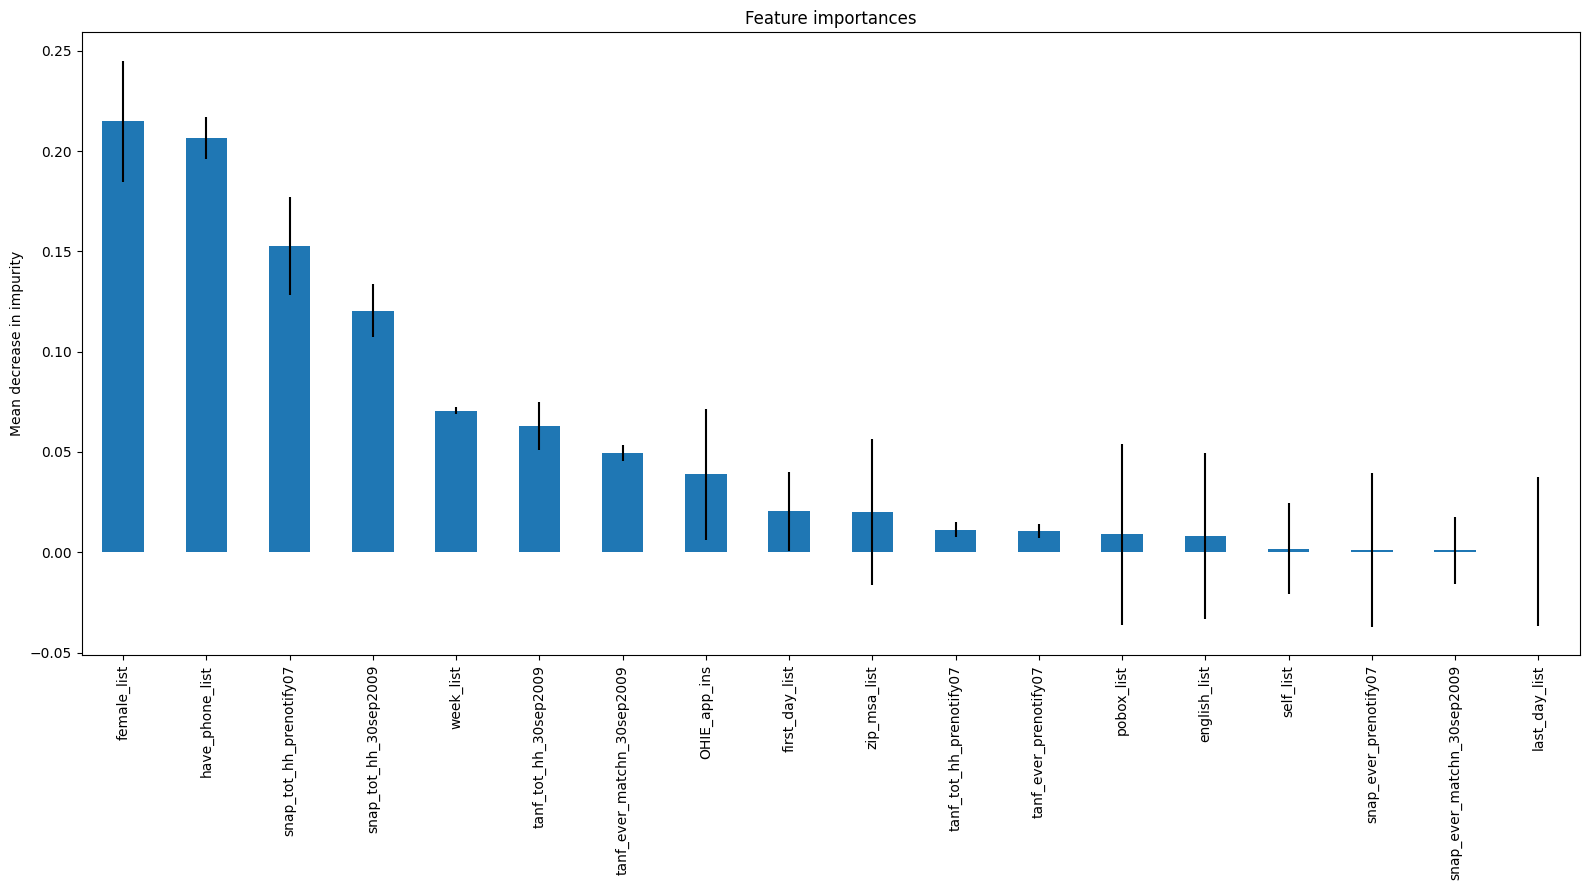

In [308]:
feature_names = X_miss.columns
importances = RF_full.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_full.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
forest_importances_sorted = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize =(16, 9))
forest_importances_sorted.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### TODO 3: keep checking what X we want to use - ongoing / done

In [327]:
forest_importances_sorted[:10]
# examine everything > 0.05

female_list                   0.214787
have_phone_list               0.206367
snap_tot_hh_prenotify07       0.152630
snap_tot_hh_30sep2009         0.120415
week_list                     0.070511
tanf_tot_hh_30sep2009         0.062997
tanf_ever_matchn_30sep2009    0.049506
OHIE_app_ins                  0.038945
first_day_list                0.020327
zip_msa_list                  0.020204
dtype: float64

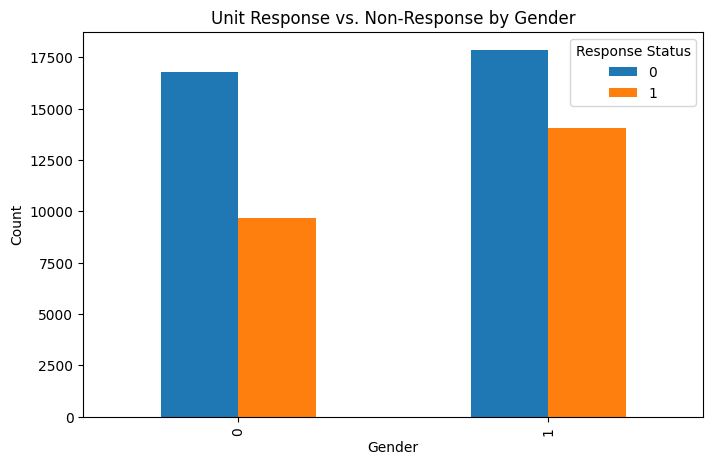

In [313]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,5)
#f12m_imp_data = f12m_imp_data[f12m_imp_data['female_list'] != -1]
pd.crosstab(f12m_imp_data.female_list.astype(int),f12m_imp_data.returned_12m_int).plot(kind='bar')
plt.title('Unit Response vs. Non-Response by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

legend = plt.legend()
legend.set_title('Response Status')

plt.savefig('just_gender')

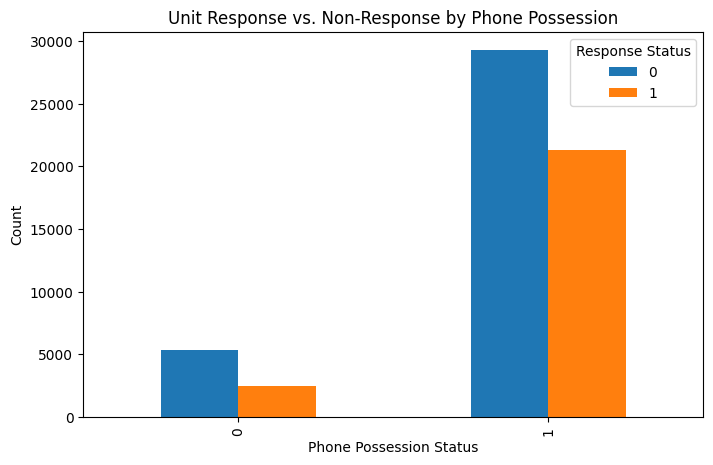

In [317]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,5)
pd.crosstab(f12m_imp_data.have_phone_list.astype(int),f12m_imp_data.returned_12m_int).plot(kind='bar')
plt.title('Unit Response vs. Non-Response by Phone Possession')
plt.xlabel('Phone Possession Status')
plt.ylabel('Count')

legend = plt.legend()
legend.set_title('Response Status')

plt.savefig('just_phone')

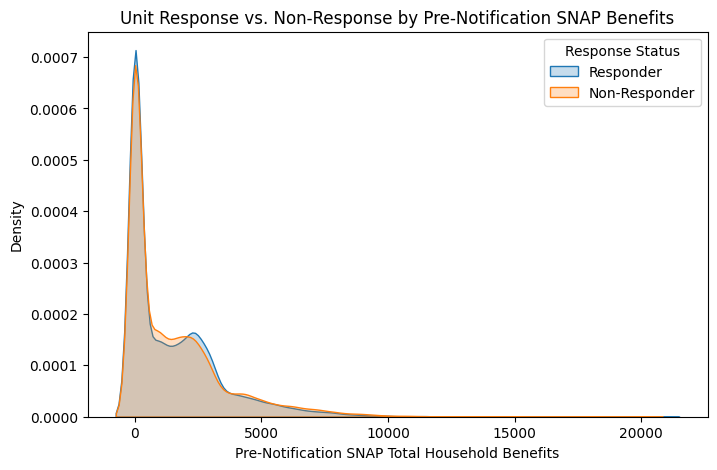

<Figure size 800x500 with 0 Axes>

In [337]:
plt.figure(figsize=(8, 5))

sns.kdeplot(f12m_imp_data[f12m_imp_data['returned_12m_int'] == 1]['snap_tot_hh_prenotify07'], label='Responder', fill=True)
sns.kdeplot(f12m_imp_data[f12m_imp_data['returned_12m_int'] == 0]['snap_tot_hh_prenotify07'], label='Non-Responder', fill=True)

plt.xlabel('Pre-Notification SNAP Total Household Benefits')
plt.ylabel('Density')
plt.title('Unit Response vs. Non-Response by Pre-Notification SNAP Benefits')

legend = plt.legend()
legend.set_title('Response Status')

plt.show()
plt.savefig('just_pre_snap')

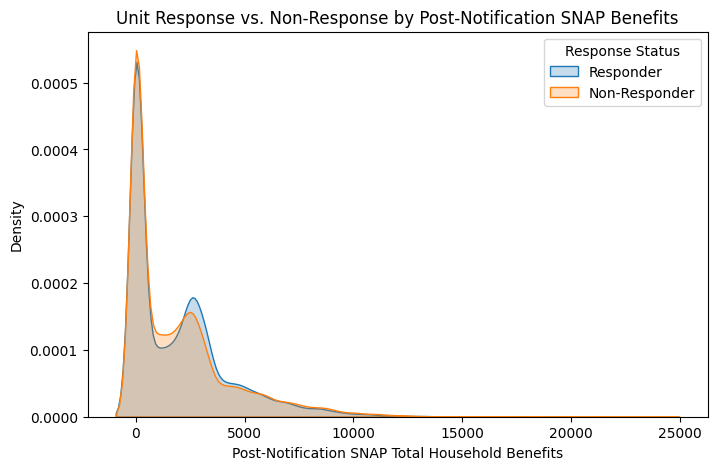

<Figure size 800x500 with 0 Axes>

In [338]:
plt.figure(figsize=(8, 5))

sns.kdeplot(f12m_imp_data[f12m_imp_data['returned_12m_int'] == 1]['snap_tot_hh_30sep2009'], label='Responder', fill=True)
sns.kdeplot(f12m_imp_data[f12m_imp_data['returned_12m_int'] == 0]['snap_tot_hh_30sep2009'], label='Non-Responder', fill=True)

plt.xlabel('Post-Notification SNAP Total Household Benefits')
plt.ylabel('Density')
plt.title('Unit Response vs. Non-Response by Post-Notification SNAP Benefits')

legend = plt.legend()
legend.set_title('Response Status')

plt.show()
plt.savefig('just_post_snap')

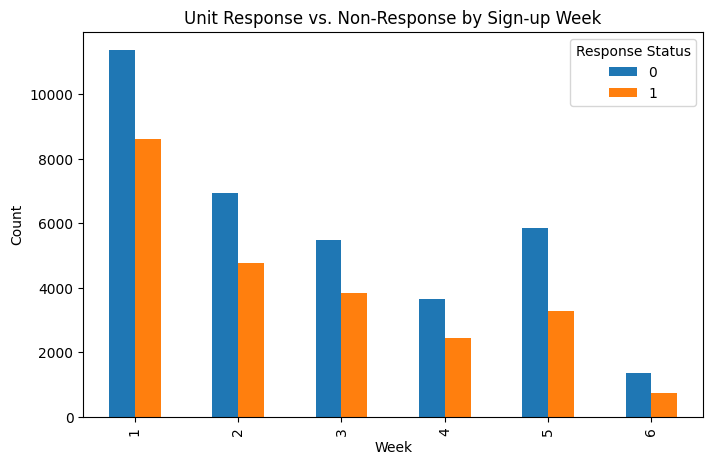

In [326]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,5)
#f12m_imp_data = f12m_imp_data[f12m_imp_data['female_list'] != -1]
pd.crosstab(f12m_imp_data.week_list.astype(int)+1,f12m_imp_data.returned_12m_int).plot(kind='bar')
plt.title('Unit Response vs. Non-Response by Sign-up Week')
plt.xlabel('Week')
plt.ylabel('Count')

legend = plt.legend()
legend.set_title('Response Status')

plt.savefig('just_week')

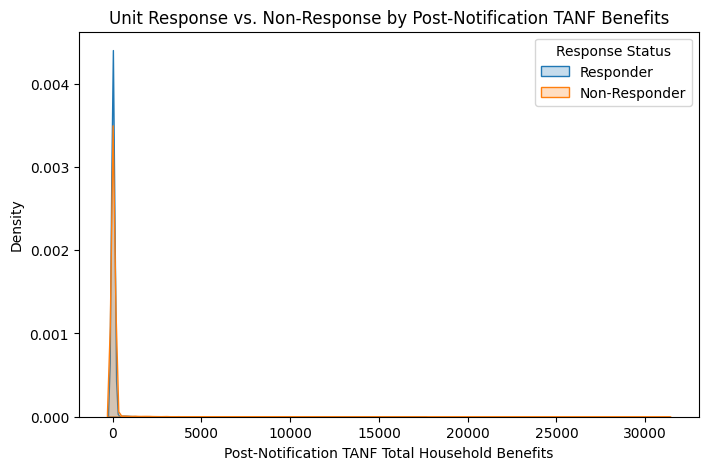

<Figure size 800x500 with 0 Axes>

In [339]:
plt.figure(figsize=(8, 5))

sns.kdeplot(f12m_imp_data[f12m_imp_data['returned_12m_int'] == 1]['tanf_tot_hh_30sep2009'], label='Responder', fill=True)
sns.kdeplot(f12m_imp_data[f12m_imp_data['returned_12m_int'] == 0]['tanf_tot_hh_30sep2009'], label='Non-Responder', fill=True)

plt.xlabel('Post-Notification TANF Total Household Benefits')
plt.ylabel('Density')
plt.title('Unit Response vs. Non-Response by Post-Notification TANF Benefits')

legend = plt.legend()
legend.set_title('Response Status')

plt.show()
plt.savefig('just_post_tanf')

In [334]:
f12m_imp_corr4 = f12m_imp_data[['protocol_12m', 'weight_12m', 'age', 'female_list', 'have_phone_list', 'snap_tot_hh_prenotify07',
                  'snap_tot_hh_30sep2009', 'week_list', 'tanf_tot_hh_30sep2009']]

In [336]:
corr4_mat = f12m_imp_corr4.corr() #.iloc[0, :]
corr4_mat

,protocol_12m,weight_12m,age,female_list,have_phone_list,snap_tot_hh_prenotify07,snap_tot_hh_30sep2009,week_list,tanf_tot_hh_30sep2009
protocol_12m,1.000000,0.900342,-0.072375,-0.028064,-0.008217,0.014713,0.003042,0.019669,0.017105
weight_12m,0.900342,1.000000,-0.003789,0.002048,0.007566,0.005669,0.001412,-0.001467,0.001708
age,-0.072375,-0.003789,1.000000,0.004286,0.010667,-0.074335,-0.100194,-0.048965,-0.073539
female_list,-0.028064,0.002048,0.004286,1.000000,0.032378,0.061677,0.050863,-0.020288,0.065172
have_phone_list,-0.008217,0.007566,0.010667,0.032378,1.000000,0.028203,0.038913,0.032117,0.001928
snap_tot_hh_prenotify07,0.014713,0.005669,-0.074335,0.061677,0.028203,1.000000,0.670736,-0.050488,0.169907
snap_tot_hh_30sep2009,0.003042,0.001412,-0.100194,0.050863,0.038913,0.670736,1.000000,-0.042472,0.254147
week_list,0.019669,-0.001467,-0.048965,-0.020288,0.032117,-0.050488,-0.042472,1.000000,-0.004406
tanf_tot_hh_30sep2009,0.017105,0.001708,-0.073539,0.065172,0.001928,0.169907,0.254147,-0.004406,1.000000


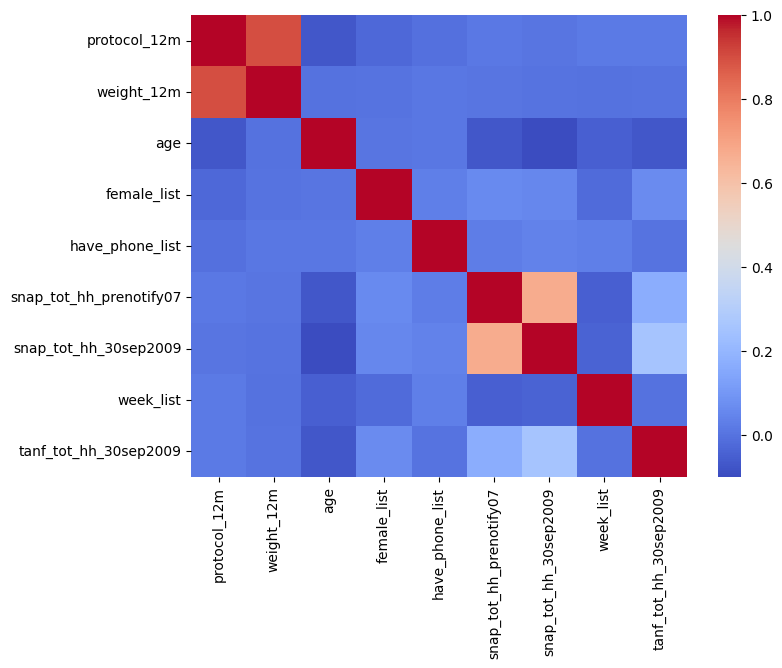

In [341]:
plt.figure(figsize = (8,6))
sns.heatmap(corr4_mat, cmap='coolwarm')
plt.show()
# only (protocol_12m, weight_12m) and (pre_snap, post_snap) are decently correlated

### TODO 4: justification graphs for continuous covariates - done, see above

## Part 3: Results

In [342]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [5]:
# need to read again because my computer crashed
#file_path = 'OHIE/'
#sdata12m = pd.read_csv(file_path+'s12m_data.csv')

In [376]:
outcome1 = ['rx_any_12m', 'rx_num_mod_12m', 'doc_any_12m', 'doc_num_mod_12m', 
             'er_any_12m', 'er_num_mod_12m', 'hosp_any_12m' , 'hosp_num_mod_12m']

outcome2 = ['cost_any_oop_12m', 'cost_any_owe_12m', 'cost_borrow_12m', 'cost_refused_12m'] 

outcome3 = ['neg_health_gen_bin_12m', 'neg_health_chg_bin_12m', 'gooddays_phys_12m','gooddays_ment_12m',
            'neg_health_work_12m', 'neg_dep_indc'] 

outcome4 = ['usual_clinic_12m', 'usual_doc_12m', 'needmet_med_12m', 'needmet_rx_12m', 
            'ner_noner_12m', 'med_qual_bin_12m', 'happiness_12m'] 

outcomes = outcome1 + outcome2 + outcome3 + outcome4

In [416]:
W = ['numhh_list_1.0', 'numhh_list_2.0', 'numhh_list_3.0', 'wave_survey12m_0.0', 'wave_survey12m_1.0',
     'wave_survey12m_2.0', 'wave_survey12m_3.0', 'wave_survey12m_4.0', 'wave_survey12m_5.0', 'wave_survey12m_6.0',
     'numhh_wave_intcat_1.0:0.0', 'numhh_wave_intcat_1.0:1.0', 'numhh_wave_intcat_1.0:2.0', 'numhh_wave_intcat_1.0:3.0',
     'numhh_wave_intcat_1.0:4.0', 'numhh_wave_intcat_1.0:5.0', 'numhh_wave_intcat_1.0:6.0', 'numhh_wave_intcat_2.0:0.0',
     'numhh_wave_intcat_2.0:1.0', 'numhh_wave_intcat_2.0:2.0', 'numhh_wave_intcat_2.0:3.0', 'numhh_wave_intcat_2.0:4.0',
     'numhh_wave_intcat_2.0:5.0', 'numhh_wave_intcat_2.0:6.0', 'numhh_wave_intcat_3.0:0.0', 'numhh_wave_intcat_3.0:1.0',
     'numhh_wave_intcat_3.0:2.0']

In [542]:
X1 = ['weight_12m']

In [417]:
X = ['protocol_12m', 'weight_12m', 'age', 'female_list', 'have_phone_list', 'snap_tot_hh_prenotify07',
     'snap_tot_hh_30sep2009', 'week_list', 'tanf_tot_hh_30sep2009']

In [561]:
X_alt = ['protocol_12m', 'age', 'female_list', 'have_phone_list', 'snap_tot_hh_prenotify07',
     'snap_tot_hh_30sep2009', 'week_list', 'tanf_tot_hh_30sep2009']

In [562]:
X_all = ['have_phone_list', 'english_list', 'female_list', 'first_day_list','last_day_list',
         'pobox_list', 'self_list', 'week_list', 'zip_msa_list', 'OHIE_app_ins', 'age',
         'snap_ever_prenotify07', 'snap_ever_matchn_30sep2009', 'snap_tot_hh_prenotify07', 'snap_tot_hh_30sep2009',
         'tanf_ever_prenotify07', 'tanf_ever_matchn_30sep2009', 'tanf_tot_hh_prenotify07', 'tanf_tot_hh_30sep2009',
         'weight_intensive_12m', 'protocol_12m']
# just in case

In [380]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [261]:
from sklearn.preprocessing import StandardScaler

In [418]:
#W = controls
#X = ['intproto_indc', 'age', 'snap_tot_hh_prenotify07', 'snap_tot_hh_30sep2009', 'zip_msa_indc']
Z_b = ['treatment']
D_b = ['ohp_all_ever_matchn_30sep2009']
S_b = ['returned_12m']
Y_b = ['rx_any_12m']

rx_any_vars = W + X + Z_b + D_b + S_b + Y_b
rx_any_data = f12m_imp_data[rx_any_vars]

Z = 'treatment'
D = 'ohp_all_ever_matchn_30sep2009'
S = 'returned_12m'
Y = 'rx_any_12m'

In [519]:
def get_tau(Y, D, Z, S, r, q, a1, a0, b1, b0, f1, f0, g1, g0):
    g11 = (Y*Z*S)/ (r*q) - (Z - r)*a1/(r*r) - (S - q)*b1/(r*q)
    g10 = (Y*(1-Z)*S)/((1-r)*q) - (Z - r)*a0/((1-r)*(1-r)) - (S - q)*b0/((1-r)*q)
    g21 = (D*Z*S)/(r*q) - (Z - r)*f1/(r*r) - (S - q)*g1/(r*q)
    g20 = (D*(1-Z)*S)/((1-r)*q) - (Z - r)*f0/((1-r)*(1-r)) - (S - q)*g0/((1-r)*q)
    
    return np.mean(g11 - g10) / np.mean(g21 - g20)

In [471]:
data = rx_any_data 

In [472]:
# run the whole thing outside once for 1 variable for parameter selection
# obviously not ideal, but given the time constraint ... 
nfolds = 2
param_list = []
kf = KFold(n_splits=nfolds, shuffle=True, random_state=27)
tau1_vec = []
tau2_vec = []

In [476]:
#for train_index, test_index in kf.split(data):
sub_list = []

train_data = data.iloc[train_index]
test_data = data.iloc[test_index]

# need to scale data
X_train = train_data[X] # train_data[X]
W_train = train_data[W]
XW_train = train_data[X + W]
Y_train = train_data[[Y]]

X_test = test_data[X] # train_data[X]
W_test = test_data[W] 
XW_test = test_data[X + W]
Y_test = test_data[[Y]]

X_scaler = StandardScaler().fit(X_train)
X_sctrain = X_scaler.transform(X_train)
X_sctest = X_scaler.transform(X_test)

W_scaler = StandardScaler().fit(W_train)
W_sctrain = W_scaler.transform(W_train)
W_sctest = W_scaler.transform(W_test)

XW_scaler = StandardScaler().fit(XW_train)
XW_sctrain = XW_scaler.transform(XW_train)
XW_sctest = XW_scaler.transform(XW_test) 

ftrain_data = train_data[train_data[S] == 1]
fX_train = ftrain_data[X] # train_data[X]
fW_train = ftrain_data[W]
fXW_train = ftrain_data[X + W]
fY_train = ftrain_data[[Y]]

fX_scaler = StandardScaler().fit(fX_train)
fX_sctrain = fX_scaler.transform(fX_train)
fX_sctest = fX_scaler.transform(X_test)

fW_scaler = StandardScaler().fit(fW_train)
fW_sctrain = fW_scaler.transform(fW_train)
fW_sctest = fW_scaler.transform(W_test)

fXW_scaler = StandardScaler().fit(fXW_train)
fXW_sctrain = fXW_scaler.transform(fXW_train)
fXW_sctest = fXW_scaler.transform(XW_test)

fY_scaler = StandardScaler().fit(fY_train)
fY_sctrain = fY_scaler.transform(fY_train)
fY_sctest = fY_scaler.transform(Y_test)

In [478]:
# Predict r(W) 
r_model = RandomForestClassifier(random_state = 27)
r_best = GridSearchCV(r_model, n_jobs = -1, verbose = 1, 
                      param_grid = {'n_estimators': [100, 500, 1000], 
                                    'max_features': [5, 10, 20],
                                    'max_depth': [3, 5, 7],
                                    'min_samples_leaf': [2]})
r_best.fit(W_sctrain, train_data[Z])
r_pred = r_best.predict_proba(W_sctest)[:,1]
r_pred[r_pred == 0] = 1e-6

sub_list.append(r_best.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
# Predict q1(X) 
q1_model = RandomForestClassifier(random_state = 27)
q1_best = GridSearchCV(q1_model, n_jobs = -1, verbose = 1, 
                      param_grid = {'n_estimators': [100, 500, 1000],
                                    'max_features': [5, 10, 20],
                                    'max_depth': [3, 5, 7],
                                    'min_samples_leaf': [2]})
q1_best.fit(X_sctrain, train_data[S])
q1_pred = q1_best.predict_proba(X_sctest)[:,1]
q1_pred[q1_pred == 0] = 1e-6

sub_list.append(q1_best.best_params_)

In [614]:
# Predict q1(X) - alt, n_est = 100
q1_model1 = RandomForestClassifier(random_state = 27)
q1_best1 = GridSearchCV(q1_model1, n_jobs = -1, verbose = 1, 
                      param_grid = {'n_estimators': [100],
                                    'max_features': [5, 10, 20],
                                    'max_depth': [3, 5, 7],
                                    'min_samples_leaf': [2]})
q1_best1.fit(X_sctrain, train_data[S])
q1_pred1 = q1_best.predict_proba(X_sctest)[:,1]
q1_pred1[q1_pred1 == 0] = 1e-6

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [616]:
q1_best1.best_params_

{'max_depth': 7,
 'max_features': 10,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [495]:
#q1_best.cv_results_

In [487]:
# Predict q2(X,W) 
q2_model = RandomForestClassifier(random_state = 27)
q2_best = GridSearchCV(q2_model, n_jobs = -1, verbose = 1, 
                      param_grid = {'n_estimators': [100, 500, 1000],
                                    'max_features': [5, 10, 20],
                                    'max_depth': [3, 5, 7],
                                    'min_samples_leaf': [2]})
q2_best.fit(XW_sctrain, train_data[S])
q2_pred = q2_best.predict_proba(XW_sctest)[:,1]
q2_pred[q2_pred == 0] = 1e-6

sub_list.append(q2_best.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [489]:
# Predict a1(W)
a1_model = RandomForestRegressor(random_state = 27)
a1_best = GridSearchCV(a1_model, n_jobs = -1, verbose = 1, 
                      param_grid = {'n_estimators': [100, 500, 1000],
                                    'max_features': [5, 10, 20],
                                    'max_depth': [3, 5, 7],
                                    'min_samples_leaf': [2]})
a1_best.fit(fW_sctrain, fY_sctrain.flatten() * ftrain_data[Z])
a1_pred = a1_best.predict(fW_sctest)

sub_list.append(a1_best.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [617]:
# Predict a1(W) - alt, n_est = 100
a1_model1 = RandomForestRegressor(random_state = 27)
a1_best1 = GridSearchCV(a1_model1, n_jobs = -1, verbose = 1, 
                      param_grid = {'n_estimators': [100],
                                    'max_features': [5, 10, 20],
                                    'max_depth': [3, 5, 7],
                                    'min_samples_leaf': [2]})
a1_best1.fit(fW_sctrain, fY_sctrain.flatten() * ftrain_data[Z])
a1_pred1 = a1_best1.predict(fW_sctest)

a1_best1.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 2, 'n_estimators': 100}

In [498]:
# Predict a0(W)
a0_model = RandomForestRegressor(random_state = 27)
a0_best = GridSearchCV(a0_model, n_jobs = -1, verbose = 1, 
                      param_grid = {'n_estimators': [100, 500, 1000],
                                    'max_features': [5, 10, 20],
                                    'max_depth': [3, 5, 7],
                                    'min_samples_leaf': [2]})
a0_best.fit(fW_sctrain, fY_sctrain.flatten())
a0_pred = a0_best.predict(fW_sctest) - a1_pred

sub_list.append(a0_best.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [508]:
# Predict a0(W) - alt
a0_model = RandomForestRegressor(random_state = 27)
a0_best = GridSearchCV(a0_model, n_jobs = -1, verbose = 1, 
                      param_grid = {'n_estimators': [100, 500, 1000],
                                    'max_features': [5, 10, 20],
                                    'max_depth': [3, 5, 7],
                                    'min_samples_leaf': [2]})
a0_best.fit(fW_sctrain, fY_sctrain.flatten() * (1 - ftrain_data[Z]))
a0_pred = a0_best.predict(fW_sctest)

a0_best.best_params_
# the exact same parameters, so ok!

Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'max_depth': 3,
 'max_features': 10,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [500]:
# Predict b1(W)
b1_model = RandomForestRegressor(random_state = 27)
b1_best = GridSearchCV(b1_model, n_jobs = -1, verbose = 1, 
                      param_grid = {'n_estimators': [100, 500, 1000],
                                    'max_features': [5, 10, 20],
                                    'max_depth': [3, 5, 7],
                                    'min_samples_leaf': [2]})
b1_best.fit(fXW_sctrain, fY_sctrain.flatten() * ftrain_data[Z])
b1_pred = b1_best.predict(fXW_sctest)

sub_list.append(b1_best.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [503]:
# Predict b0(W)
b0_model = RandomForestRegressor(random_state=27)
b0_best = GridSearchCV(b0_model, n_jobs = -1, verbose = 1, 
                      param_grid = {'n_estimators': [100, 500, 1000],
                                    'max_features': [5, 10, 20],
                                    'max_depth': [3, 5, 7],
                                    'min_samples_leaf': [2]})
b0_best.fit(fXW_sctrain, fY_sctrain.flatten())
b0_pred = b0_best.predict(fXW_sctest) - b1_pred

sub_list.append(b0_best.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [618]:
# Predict b0(W) - alt, n_est = 100
b0_model1 = RandomForestRegressor(random_state=27)
b0_best1 = GridSearchCV(b0_model1, n_jobs = -1, verbose = 1, 
                      param_grid = {'n_estimators': [100],
                                    'max_features': [5, 10, 20],
                                    'max_depth': [3, 5, 7],
                                    'min_samples_leaf': [2]})
b0_best1.fit(fXW_sctrain, fY_sctrain.flatten())
b0_pred1 = b0_best1.predict(fXW_sctest) - b1_pred

b0_best1.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'max_depth': 7,
 'max_features': 10,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [505]:
# Predict f1(W)
f1_model = RandomForestClassifier(random_state = 27)
f1_best = GridSearchCV(f1_model, n_jobs = -1, verbose = 1, 
                      param_grid = {'n_estimators': [100, 500, 1000],
                                    'max_features': [5, 10, 20],
                                    'max_depth': [3, 5, 7],
                                    'min_samples_leaf': [2]})
f1_best.fit(fW_sctrain, ftrain_data[D] * ftrain_data[Z])
f1_pred = f1_best.predict_proba(fW_sctest)[:,1]
f1_pred[f1_pred == 0] = 1e-6

sub_list.append(f1_best.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [510]:
# Predict f0(W)
f0_model = RandomForestClassifier(random_state = 27)
f0_best = GridSearchCV(f0_model, n_jobs = -1, verbose = 1, 
                      param_grid = {'n_estimators': [100, 500, 1000],
                                    'max_features': [5, 10, 20],
                                    'max_depth': [3, 5, 7],
                                    'min_samples_leaf': [2]})
f0_best.fit(fW_sctrain, ftrain_data[D])
f0_pred = f0_best.predict_proba(fW_sctest)[:,1] - f1_pred
f0_pred[f0_pred == 0] = 1e-6

sub_list.append(f0_best.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [514]:
# Predict g1(W)
g1_model = RandomForestClassifier(random_state = 27)
g1_best = GridSearchCV(g1_model, n_jobs = -1, verbose = 1, 
                      param_grid = {'n_estimators': [100, 500, 1000],
                                    'max_features': [5, 10, 20],
                                    'max_depth': [3, 5, 7],
                                    'min_samples_leaf': [2]})
g1_best.fit(fXW_sctrain, ftrain_data[D] * ftrain_data[Z])
g1_pred = g1_best.predict_proba(fXW_sctest)[:,1]
g1_pred[g1_pred == 0] = 1e-6

sub_list.append(g1_best.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [619]:
# Predict g1(W) - alt, n_est = 100
g1_model1 = RandomForestClassifier(random_state = 27)
g1_best1 = GridSearchCV(g1_model1, n_jobs = -1, verbose = 1, 
                      param_grid = {'n_estimators': [100],
                                    'max_features': [5, 10, 20],
                                    'max_depth': [3, 5, 7],
                                    'min_samples_leaf': [2]})
g1_best1.fit(fXW_sctrain, ftrain_data[D] * ftrain_data[Z])
g1_pred1 = g1_best1.predict_proba(fXW_sctest)[:,1]
g1_pred1[g1_pred1 == 0] = 1e-6

g1_best1.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'max_depth': 7,
 'max_features': 20,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [516]:
# Predict g0(W)
g0_model = RandomForestClassifier(random_state = 27)
g0_best = GridSearchCV(g0_model, n_jobs = -1, verbose = 1, 
                      param_grid = {'n_estimators': [100, 500, 1000],
                                    'max_features': [5, 10, 20],
                                    'max_depth': [3, 5, 7],
                                    'min_samples_leaf': [2]})
g0_best.fit(fXW_sctrain, ftrain_data[D])
g0_pred = g0_best.predict_proba(fXW_sctest)[:,1] - g1_pred
g0_pred[g0_pred == 0] = 1e-6

sub_list.append(g0_best.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [620]:
# Predict g0(W)
g0_model1 = RandomForestClassifier(random_state = 27)
g0_best1 = GridSearchCV(g0_model1, n_jobs = -1, verbose = 1, 
                      param_grid = {'n_estimators': [100],
                                    'max_features': [5, 10, 20],
                                    'max_depth': [3, 5, 7],
                                    'min_samples_leaf': [2]})
g0_best1.fit(fXW_sctrain, ftrain_data[D])
g0_pred1 = g0_best1.predict_proba(fXW_sctest)[:,1] - g1_pred
g0_pred1[g0_pred1 == 0] = 1e-6

g0_best1.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'max_depth': 7,
 'max_features': 20,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [517]:
sub_list

[{'max_depth': 5,
  'max_features': 5,
  'min_samples_leaf': 2,
  'n_estimators': 100},
 {'max_depth': 7,
  'max_features': 10,
  'min_samples_leaf': 2,
  'n_estimators': 1000},
 {'max_depth': 7,
  'max_features': 20,
  'min_samples_leaf': 2,
  'n_estimators': 100},
 {'max_depth': 3,
  'max_features': 5,
  'min_samples_leaf': 2,
  'n_estimators': 1000},
 {'max_depth': 3,
  'max_features': 10,
  'min_samples_leaf': 2,
  'n_estimators': 100},
 {'max_depth': 5,
  'max_features': 20,
  'min_samples_leaf': 2,
  'n_estimators': 100},
 {'max_depth': 7,
  'max_features': 10,
  'min_samples_leaf': 2,
  'n_estimators': 500},
 {'max_depth': 3,
  'max_features': 5,
  'min_samples_leaf': 2,
  'n_estimators': 100},
 {'max_depth': 3,
  'max_features': 5,
  'min_samples_leaf': 2,
  'n_estimators': 100},
 {'max_depth': 7,
  'max_features': 20,
  'min_samples_leaf': 2,
  'n_estimators': 1000},
 {'max_depth': 7,
  'max_features': 20,
  'min_samples_leaf': 2,
  'n_estimators': 1000}]

In [511]:
len(train_data)

38912

In [512]:
len(test_data)

19457

In [532]:
Y = ['rx_any_12m']

In [536]:
# testing smth, please ignore
q1_model = RandomForestClassifier(n_estimators=100, max_features=10, max_depth=7, min_samples_leaf=2,
                              n_jobs = -1, random_state=27)
q1_model.fit(X_sctrain, train_data[S])
q1_pred1 = q1_model.predict_proba(X_sctest)[:,1]
q1_pred1[q1_pred1 == 0] = 1e-6

# Predict q2(X,W) 
q2_model = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=7, min_samples_leaf=2, 
                              n_jobs = -1, random_state=27)
q2_model.fit(XW_sctrain, train_data[S])
q2_pred1 = q2_model.predict_proba(XW_sctest)[:,1]
q2_pred1[q2_pred1 == 0] = 1e-6

In [537]:
test_data.loc[test_data[S] == 0, Y] = 0

Y_scaled = StandardScaler().fit_transform(test_data[Y]).flatten()

tau1 = get_tau(Y_scaled, test_data[D], test_data[Z], test_data[S], 
               r_pred, q1_pred1, a1_pred, a0_pred, b1_pred, b0_pred, f1_pred, f0_pred, g1_pred, g0_pred)
tau2 = get_tau(Y_scaled, test_data[D], test_data[Z], test_data[S], 
               r_pred, q2_pred1, a1_pred, a0_pred, b1_pred, b0_pred, f1_pred, f0_pred, g1_pred, g0_pred)

tau1_vec.append(tau1)
tau2_vec.append(tau2)  

In [521]:
#sub_list_copy = sub_list
#sub_list_copy1

In [538]:
tau1_vec

[0.0440446981048119, 0.08214251240588392, 0.07795253248540475]

In [539]:
tau2_vec
# this makes me worried but might be too early to say ...

[0.029654054321895232, 0.05623653373740323, 0.05623653373740323]

### TODO 5: think about justification for parameters (methods to choose them??) - done

End up doing cross validation - albeit a very lousy one.

In [621]:
# do not use, wrong version
def dml_tau_est0(data, W, X, Z, D, S, Y, nfolds=5):
    kf = KFold(n_splits=nfolds, shuffle=True, random_state=27)
    tau1_vec = []
    tau2_vec = []
    
    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]

        X_train = train_data[X] # train_data[X]
        W_train = train_data[W]
        XW_train = train_data[X + W]
        Y_train = train_data[[Y]]
        
        X_test = test_data[X] # train_data[X]
        W_test = test_data[W] 
        XW_test = test_data[X + W]
        Y_test = test_data[[Y]]
        
        X_scaler = StandardScaler().fit(X_train)
        X_sctrain = X_scaler.transform(X_train)
        X_sctest = X_scaler.transform(X_test)
        
        W_scaler = StandardScaler().fit(W_train)
        W_sctrain = W_scaler.transform(W_train)
        W_sctest = W_scaler.transform(W_test)
        
        XW_scaler = StandardScaler().fit(XW_train)
        XW_sctrain = XW_scaler.transform(XW_train)
        XW_sctest = XW_scaler.transform(XW_test) 
        
        ftrain_data = train_data[train_data[S] == 1]
        fX_train = ftrain_data[X] # train_data[X]
        fW_train = ftrain_data[W]
        fXW_train = ftrain_data[X + W]
        fY_train = ftrain_data[[Y]]
        
        fW_scaler = StandardScaler().fit(fW_train)
        fW_sctrain = fW_scaler.transform(fW_train)
        fW_sctest = fW_scaler.transform(W_test)
        
        fXW_scaler = StandardScaler().fit(fXW_train)
        fXW_sctrain = fXW_scaler.transform(fXW_train)
        fXW_sctest = fXW_scaler.transform(XW_test)
        
        fY_scaler = StandardScaler().fit(fY_train)
        fY_sctrain = fY_scaler.transform(fY_train)
        fY_sctest = fY_scaler.transform(Y_test)
        
        # Predict r(W) 
        r_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=5, min_samples_leaf=2, 
                                         n_jobs = -1, random_state=27)
        r_model.fit(W_sctrain, train_data[Z])
        r_pred = r_model.predict_proba(W_sctest)[:,1]
        r_pred[r_pred == 0] = 1e-6

        # Predict q1(X) 
        q1_model = RandomForestClassifier(n_estimators=1000, max_features=10, max_depth=7, min_samples_leaf=2,
                                          n_jobs = -1, random_state=27)
        q1_model.fit(X_sctrain, train_data[S])
        q1_pred = q1_model.predict_proba(X_sctest)[:,1]
        q1_pred[q1_pred == 0] = 1e-6
        
        # Predict q2(X,W) 
        q2_model = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=7, min_samples_leaf=2, 
                                          n_jobs = -1, random_state=27)
        q2_model.fit(XW_sctrain, train_data[S])
        q2_pred = q2_model.predict_proba(XW_sctest)[:,1]
        q2_pred[q2_pred == 0] = 1e-6

        # Predict a1(W)
        a1_model = RandomForestRegressor(n_estimators=1000, max_features=5, max_depth=3, min_samples_leaf=2, 
                                         n_jobs = -1, random_state=27)
        a1_model.fit(fW_sctrain, fY_sctrain.flatten() * ftrain_data[Z])
        a1_pred = a1_model.predict(fW_sctest)

        # Predict a0(W)
        a0_model = RandomForestRegressor(n_estimators=100, max_features=10, max_depth=3, min_samples_leaf=2, 
                                         n_jobs = -1, random_state=27)
        a0_model.fit(fW_sctrain, fY_sctrain.flatten())
        a0_pred = a0_model.predict(fW_sctest) - a1_pred

        # Predict b1(W)
        b1_model = RandomForestRegressor(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2, 
                                         n_jobs = -1, random_state=27)
        b1_model.fit(fXW_sctrain, fY_sctrain.flatten() * ftrain_data[Z])
        b1_pred = b1_model.predict(fXW_sctest)

        # Predict b0(W)
        b0_model = RandomForestRegressor(n_estimators=500, max_features=10, max_depth=7, min_samples_leaf=2, 
                                         n_jobs = -1, random_state=27)
        b0_model.fit(fXW_sctrain, fY_sctrain.flatten())
        b0_pred = b0_model.predict(fXW_sctest) - b1_pred

         # Predict f1(W)
        f1_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=3, min_samples_leaf=2, 
                                          n_jobs = -1, random_state=27)
        f1_model.fit(fW_sctrain, ftrain_data[D] * ftrain_data[Z])
        f1_pred = f1_model.predict_proba(fW_sctest)[:,1]
        f1_pred[f1_pred == 0] = 1e-6

        # Predict f0(W)
        f0_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=3, min_samples_leaf=2, 
                                          n_jobs = -1, random_state=27)
        f0_model.fit(fW_sctrain, ftrain_data[D])
        f0_pred = f0_model.predict_proba(fW_sctest)[:,1] - f1_pred
        f0_pred[f0_pred == 0] = 1e-6
        
        # Predict g1(W)
        g1_model = RandomForestClassifier(n_estimators=1000, max_features=20, max_depth=7, min_samples_leaf=2, 
                                          n_jobs = -1, random_state=27)
        g1_model.fit(fXW_sctrain, ftrain_data[D] * ftrain_data[Z])
        g1_pred = g1_model.predict_proba(fXW_sctest)[:,1]
        g1_pred[g1_pred == 0] = 1e-6

        # Predict g0(W)
        g0_model = RandomForestClassifier(n_estimators=1000, max_features=20, max_depth=7, min_samples_leaf=2, 
                                          n_jobs = -1, random_state=27)
        g0_model.fit(fXW_sctrain, ftrain_data[D])
        g0_pred = g0_model.predict_proba(fXW_sctest)[:,1] - g1_pred
        g0_pred[g0_pred == 0] = 1e-6

        test_data.loc[test_data[S] == 0, Y] = 0

        tau1 = get_tau(test_data[Y], test_data[D], test_data[Z], test_data[S], 
                       r_pred, q1_pred, a1_pred, a0_pred, b1_pred, b0_pred, f1_pred, f0_pred, g1_pred, g0_pred)
        tau2 = get_tau(test_data[Y], test_data[D], test_data[Z], test_data[S], 
                       r_pred, q2_pred, a1_pred, a0_pred, b1_pred, b0_pred, f1_pred, f0_pred, g1_pred, g0_pred)

        tau1_vec.append(tau1)
        tau2_vec.append(tau2)

    return np.mean(tau1_vec), np.mean(tau2_vec)
    

In [624]:
# right version, use this
def dml_tau_est1(data, W, X, Z, D, S, Y, nfolds=5):
    kf = KFold(n_splits=nfolds, shuffle=True, random_state=27)
    tau1_vec = []
    tau2_vec = []
    
    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]

        X_train = train_data[X] # train_data[X]
        W_train = train_data[W]
        XW_train = train_data[X + W]
        Y_train = train_data[[Y]]
        
        X_test = test_data[X] # train_data[X]
        W_test = test_data[W] 
        XW_test = test_data[X + W]
        Y_test = test_data[[Y]]
        
        X_scaler = StandardScaler().fit(X_train)
        X_sctrain = X_scaler.transform(X_train)
        X_sctest = X_scaler.transform(X_test)
        
        W_scaler = StandardScaler().fit(W_train)
        W_sctrain = W_scaler.transform(W_train)
        W_sctest = W_scaler.transform(W_test)
        
        XW_scaler = StandardScaler().fit(XW_train)
        XW_sctrain = XW_scaler.transform(XW_train)
        XW_sctest = XW_scaler.transform(XW_test) 
        
        ftrain_data = train_data[train_data[S] == 1]
        fX_train = ftrain_data[X] # train_data[X]
        fW_train = ftrain_data[W]
        fXW_train = ftrain_data[X + W]
        fY_train = ftrain_data[[Y]]
        
        fW_scaler = StandardScaler().fit(fW_train)
        fW_sctrain = fW_scaler.transform(fW_train)
        fW_sctest = fW_scaler.transform(W_test)
        
        fXW_scaler = StandardScaler().fit(fXW_train)
        fXW_sctrain = fXW_scaler.transform(fXW_train)
        fXW_sctest = fXW_scaler.transform(XW_test)
        
        fY_scaler = StandardScaler().fit(fY_train)
        fY_sctrain = fY_scaler.transform(fY_train)
        fY_sctest = fY_scaler.transform(Y_test)
        
        # Predict r(W) 
        r_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=5, min_samples_leaf=2, 
                                         n_jobs = -1, random_state=27)
        r_model.fit(W_sctrain, train_data[Z])
        r_pred = r_model.predict_proba(W_sctest)[:,1]
        r_pred[r_pred == 0] = 1e-6

        # Predict q1(X) 
        q1_model = RandomForestClassifier(n_estimators=100, max_features=10, max_depth=7, min_samples_leaf=2,
                                          n_jobs = -1, random_state=27)
        q1_model.fit(X_sctrain, train_data[S])
        q1_pred = q1_model.predict_proba(X_sctest)[:,1]
        q1_pred[q1_pred == 0] = 1e-6
        
        # Predict q2(X,W) 
        q2_model = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=7, min_samples_leaf=2, 
                                          n_jobs = -1, random_state=27)
        q2_model.fit(XW_sctrain, train_data[S])
        q2_pred = q2_model.predict_proba(XW_sctest)[:,1]
        q2_pred[q2_pred == 0] = 1e-6

        # Predict a1(W)
        a1_model = RandomForestRegressor(n_estimators=100, max_features=5, max_depth=3, min_samples_leaf=2, 
                                         n_jobs = -1, random_state=27)
        a1_model.fit(fW_sctrain, fY_sctrain.flatten() * ftrain_data[Z])
        a1_pred = a1_model.predict(fW_sctest)

        # Predict a0(W)
        a0_model = RandomForestRegressor(n_estimators=100, max_features=10, max_depth=3, min_samples_leaf=2, 
                                         n_jobs = -1, random_state=27)
        a0_model.fit(fW_sctrain, fY_sctrain.flatten())
        a0_pred = a0_model.predict(fW_sctest) - a1_pred

        # Predict b1(W)
        b1_model = RandomForestRegressor(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2, 
                                         n_jobs = -1, random_state=27)
        b1_model.fit(fXW_sctrain, fY_sctrain.flatten() * ftrain_data[Z])
        b1_pred = b1_model.predict(fXW_sctest)

        # Predict b0(W)
        b0_model = RandomForestRegressor(n_estimators=100, max_features=10, max_depth=7, min_samples_leaf=2, 
                                         n_jobs = -1, random_state=27)
        b0_model.fit(fXW_sctrain, fY_sctrain.flatten())
        b0_pred = b0_model.predict(fXW_sctest) - b1_pred

         # Predict f1(W)
        f1_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=3, min_samples_leaf=2, 
                                          n_jobs = -1, random_state=27)
        f1_model.fit(fW_sctrain, ftrain_data[D] * ftrain_data[Z])
        f1_pred = f1_model.predict_proba(fW_sctest)[:,1]
        f1_pred[f1_pred == 0] = 1e-6

        # Predict f0(W)
        f0_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=3, min_samples_leaf=2, 
                                          n_jobs = -1, random_state=27)
        f0_model.fit(fW_sctrain, ftrain_data[D])
        f0_pred = f0_model.predict_proba(fW_sctest)[:,1] - f1_pred
        f0_pred[f0_pred == 0] = 1e-6
        
        # Predict g1(W)
        g1_model = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=7, min_samples_leaf=2, 
                                          n_jobs = -1, random_state=27)
        g1_model.fit(fXW_sctrain, ftrain_data[D] * ftrain_data[Z])
        g1_pred = g1_model.predict_proba(fXW_sctest)[:,1]
        g1_pred[g1_pred == 0] = 1e-6

        # Predict g0(W)
        g0_model = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=7, min_samples_leaf=2, 
                                          n_jobs = -1, random_state=27)
        g0_model.fit(fXW_sctrain, ftrain_data[D])
        g0_pred = g0_model.predict_proba(fXW_sctest)[:,1] - g1_pred
        g0_pred[g0_pred == 0] = 1e-6

        test_data.loc[test_data[S] == 0, Y] = 0

        tau1 = get_tau(test_data[Y], test_data[D], test_data[Z], test_data[S], 
                       r_pred, q1_pred, a1_pred, a0_pred, b1_pred, b0_pred, f1_pred, f0_pred, g1_pred, g0_pred)
        tau2 = get_tau(test_data[Y], test_data[D], test_data[Z], test_data[S], 
                       r_pred, q2_pred, a1_pred, a0_pred, b1_pred, b0_pred, f1_pred, f0_pred, g1_pred, g0_pred)

        tau1_vec.append(tau1)
        tau2_vec.append(tau2)

    return np.mean(tau1_vec), np.mean(tau2_vec)
    

In [623]:
# right version alterative - to process 1-dim X
def dml_tau_est2(data, W, X, Z, D, S, Y, nfolds=5):
    kf = KFold(n_splits=nfolds, shuffle=True, random_state=27)
    tau1_vec = []
    tau2_vec = []
    
    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]

        X_train = train_data[[X]] # train_data[X]
        W_train = train_data[W]
        XW_train = train_data[X + W]
        Y_train = train_data[[Y]]
        
        X_test = test_data[[X]] # train_data[X]
        W_test = test_data[W] 
        XW_test = test_data[X + W]
        Y_test = test_data[[Y]]
        
        X_scaler = StandardScaler().fit(X_train)
        X_sctrain = X_scaler.transform(X_train)
        X_sctest = X_scaler.transform(X_test)
        
        W_scaler = StandardScaler().fit(W_train)
        W_sctrain = W_scaler.transform(W_train)
        W_sctest = W_scaler.transform(W_test)
        
        XW_scaler = StandardScaler().fit(XW_train)
        XW_sctrain = XW_scaler.transform(XW_train)
        XW_sctest = XW_scaler.transform(XW_test) 
        
        ftrain_data = train_data[train_data[S] == 1]
        fX_train = ftrain_data[X] # train_data[X]
        fW_train = ftrain_data[W]
        fXW_train = ftrain_data[X + W]
        fY_train = ftrain_data[[Y]]
        
        fW_scaler = StandardScaler().fit(fW_train)
        fW_sctrain = fW_scaler.transform(fW_train)
        fW_sctest = fW_scaler.transform(W_test)
        
        fXW_scaler = StandardScaler().fit(fXW_train)
        fXW_sctrain = fXW_scaler.transform(fXW_train)
        fXW_sctest = fXW_scaler.transform(XW_test)
        
        fY_scaler = StandardScaler().fit(fY_train)
        fY_sctrain = fY_scaler.transform(fY_train)
        fY_sctest = fY_scaler.transform(Y_test)
        
        # Predict r(W) 
        r_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=5, min_samples_leaf=2, 
                                         n_jobs = -1, random_state=27)
        r_model.fit(W_sctrain, train_data[Z])
        r_pred = r_model.predict_proba(W_sctest)[:,1]
        r_pred[r_pred == 0] = 1e-6

        # Predict q1(X) 
        q1_model = RandomForestClassifier(n_estimators=100, max_features=10, max_depth=7, min_samples_leaf=2,
                                          n_jobs = -1, random_state=27)
        q1_model.fit(X_sctrain, train_data[S])
        q1_pred = q1_model.predict_proba(X_sctest)[:,1]
        q1_pred[q1_pred == 0] = 1e-6
        
        # Predict q2(X,W) 
        q2_model = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=7, min_samples_leaf=2, 
                                          n_jobs = -1, random_state=27)
        q2_model.fit(XW_sctrain, train_data[S])
        q2_pred = q2_model.predict_proba(XW_sctest)[:,1]
        q2_pred[q2_pred == 0] = 1e-6

        # Predict a1(W)
        a1_model = RandomForestRegressor(n_estimators=100, max_features=5, max_depth=3, min_samples_leaf=2, 
                                         n_jobs = -1, random_state=27)
        a1_model.fit(fW_sctrain, fY_sctrain.flatten() * ftrain_data[Z])
        a1_pred = a1_model.predict(fW_sctest)

        # Predict a0(W)
        a0_model = RandomForestRegressor(n_estimators=100, max_features=10, max_depth=3, min_samples_leaf=2, 
                                         n_jobs = -1, random_state=27)
        a0_model.fit(fW_sctrain, fY_sctrain.flatten())
        a0_pred = a0_model.predict(fW_sctest) - a1_pred

        # Predict b1(W)
        b1_model = RandomForestRegressor(n_estimators=100, max_features=20, max_depth=5, min_samples_leaf=2, 
                                         n_jobs = -1, random_state=27)
        b1_model.fit(fXW_sctrain, fY_sctrain.flatten() * ftrain_data[Z])
        b1_pred = b1_model.predict(fXW_sctest)

        # Predict b0(W)
        b0_model = RandomForestRegressor(n_estimators=100, max_features=10, max_depth=7, min_samples_leaf=2, 
                                         n_jobs = -1, random_state=27)
        b0_model.fit(fXW_sctrain, fY_sctrain.flatten())
        b0_pred = b0_model.predict(fXW_sctest) - b1_pred

         # Predict f1(W)
        f1_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=3, min_samples_leaf=2, 
                                          n_jobs = -1, random_state=27)
        f1_model.fit(fW_sctrain, ftrain_data[D] * ftrain_data[Z])
        f1_pred = f1_model.predict_proba(fW_sctest)[:,1]
        f1_pred[f1_pred == 0] = 1e-6

        # Predict f0(W)
        f0_model = RandomForestClassifier(n_estimators=100, max_features=5, max_depth=3, min_samples_leaf=2, 
                                          n_jobs = -1, random_state=27)
        f0_model.fit(fW_sctrain, ftrain_data[D])
        f0_pred = f0_model.predict_proba(fW_sctest)[:,1] - f1_pred
        f0_pred[f0_pred == 0] = 1e-6
        
        # Predict g1(W)
        g1_model = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=7, min_samples_leaf=2, 
                                          n_jobs = -1, random_state=27)
        g1_model.fit(fXW_sctrain, ftrain_data[D] * ftrain_data[Z])
        g1_pred = g1_model.predict_proba(fXW_sctest)[:,1]
        g1_pred[g1_pred == 0] = 1e-6

        # Predict g0(W)
        g0_model = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=7, min_samples_leaf=2, 
                                          n_jobs = -1, random_state=27)
        g0_model.fit(fXW_sctrain, ftrain_data[D])
        g0_pred = g0_model.predict_proba(fXW_sctest)[:,1] - g1_pred
        g0_pred[g0_pred == 0] = 1e-6

        test_data.loc[test_data[S] == 0, Y] = 0

        tau1 = get_tau(test_data[Y], test_data[D], test_data[Z], test_data[S], 
                       r_pred, q1_pred, a1_pred, a0_pred, b1_pred, b0_pred, f1_pred, f0_pred, g1_pred, g0_pred)
        tau2 = get_tau(test_data[Y], test_data[D], test_data[Z], test_data[S], 
                       r_pred, q2_pred, a1_pred, a0_pred, b1_pred, b0_pred, f1_pred, f0_pred, g1_pred, g0_pred)

        tau1_vec.append(tau1)
        tau2_vec.append(tau2)

    return np.mean(tau1_vec), np.mean(tau2_vec)
    

### TODO 6: re-run coeffs based on new X (after deciding on X) - done

In [625]:
# some test runs to determine X
Z_b = ['treatment']
D_b = ['ohp_all_ever_matchn_30sep2009']
S_b = ['returned_12m']
Y_b = ['rx_any_12m']

rx_any_vars = W + X + Z_b + D_b + S_b + Y_b
rx_any_data = f12m_imp_data[rx_any_vars]

Z = 'treatment'
D = 'ohp_all_ever_matchn_30sep2009'
S = 'returned_12m'
Y = 'rx_any_12m'

In [553]:
rx_any_tau1, rx_any_tau2 = dml_tau_est1(rx_any_data, W, X, Z, D, S, Y, nfolds=5)

In [556]:
rx_any_tau1
# -0.016142477391793555
rx_any_tau2
# 0.008661131444626208

0.008661131444626208

In [558]:
rx_any_tau3, rx_any_tau4 = dml_tau_est0(rx_any_data, W, X, Z, D, S, Y, nfolds=5)

In [560]:
rx_any_tau3
# -0.017759807898652176
rx_any_tau4 
# 0.009174134278305584

0.009174134278305584

In [563]:
rx_any_tau5, rx_any_tau6 = dml_tau_est1(rx_any_data, W, X_alt, Z, D, S, Y, nfolds=5)

In [567]:
rx_any_tau5
# -0.04303259130345971
rx_any_tau6
# -0.04967415213747668
# let's going with X_alt
# I think weight_12m is doing smth weird
# so use dml_tau_est1 for computational efficiency + X_alt instead

-0.04967415213747668

In [586]:
#outcomes
coeff_df = pd.DataFrame()

In [587]:
for y in outcomes:
    Y_b = [y]
    vars = W + X_alt + Z_b + D_b + S_b + Y_b
    data = f12m_imp_data[vars]
    Y = y
    
    tau1, tau2 = dml_tau_est1(data, W, X_alt, Z, D, S, Y, nfolds=5)
    
    temp = pd.DataFrame([tau1, tau2]).T
    coeff_df = pd.concat([coeff_df, temp], axis = 0)

coeff_df.columns = ['const coeff', 'insurance coeff'] 

/var/folders/dc/j_9rc1xd6xj5836y93540spc0000gn/T/ipykernel_18310/3181604904.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  test_data.loc[test_data[S] == 0, Y] = 0
/var/folders/dc/j_9rc1xd6xj5836y93540spc0000gn/T/ipykernel_18310/3181604904.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  test_data.loc[test_data[S] == 0, Y] = 0
/var/folders/dc/j_9rc1xd6xj5836y93540spc0000gn/T/ipykernel_18310/3181604904.py:124: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  test_data.loc[test_data[S] == 0, Y] = 0
/

In [588]:
coeff_df.columns = ['prop_score_X', 'prop_score_XW'] 

In [612]:
#coeff_df_copy = coeff_df
#new_index = np.arange(0, 24)
coeff_df1 = coeff_df.reset_index(drop=True)

In [613]:
ccoeff_df = pd.concat([pd.DataFrame(outcomes), coeff_df1], axis=1)
ccoeff_df

,0,prop_score_X,prop_score_XW
0,rx_any_12m,-0.043033,-0.049674
1,rx_num_mod_12m,-0.099726,-0.108903
2,doc_any_12m,0.133352,0.129742
3,doc_num_mod_12m,0.649281,0.660215
4,er_any_12m,-0.033832,-0.035416
5,er_num_mod_12m,-0.063642,-0.064509
6,hosp_any_12m,-0.009688,-0.010420
7,hosp_num_mod_12m,-0.001997,-0.000304
8,cost_any_oop_12m,-0.271558,-0.272475
9,cost_any_owe_12m,-0.272752,-0.271778


### TODO 7: run bootstrapped SE (multiple people ??) - ongoing

In [629]:
outcome1

['usual_clinic_12m',
 'usual_doc_12m',
 'needmet_med_12m',
 'needmet_rx_12m',
 'ner_noner_12m',
 'med_qual_bin_12m',
 'happiness_12m']

In [630]:
from joblib import Parallel, delayed

In [631]:
Z_b = ['treatment']
D_b = ['ohp_all_ever_matchn_30sep2009']
S_b = ['returned_12m']
Y_b = ['rx_any_12m']

rx_any_vars = W + X + Z_b + D_b + S_b + Y_b
rx_any_data = f12m_imp_data[rx_any_vars]

Z = 'treatment'
D = 'ohp_all_ever_matchn_30sep2009'
S = 'returned_12m'
Y = 'rx_any_12m'

#rx_any_tau1, rx_any_tau2 = dml_tau_est1(rx_any_data, W, X, Z, D, S, Y, nfolds=5)

In [633]:
rx_any_data.shape[0]

58369

In [ ]:
# test run
# never mind, will be doing this 1 by 1 to prevent start from all over again
se_rx_any_df = pd.DataFrame()

bootstraps = 100
n = rx_any_data.shape[0]

tau_bootstraps = Parallel(n_jobs=-1)(
    delayed(lambda: dml_tau_est1(rx_any_data.sample(n, replace=True), W, X_alt, Z, D, S, Y))() for _ in range(1, bootstraps + 1))

In [649]:
rx_any_tau_bootstraps = tau_bootstraps
#tau_bootstraps_copy

(-0.06546348582480468, -0.06897974878131993)

In [646]:
tau_bootstraps = pd.DataFrame(tau_bootstraps)
tau_bootstraps

,0,1
0,-0.065463,-0.068980
1,-0.040994,-0.048266


In [672]:
#cix_lower = np.percentile(tau_bootstraps, 2.5)
#cix_upper = np.percentile(tau_bootstraps, 97.5)

cix_lower = tau_bootstraps.quantile(0.025)
cix_upper = tau_bootstraps.quantile(0.975)

temp = pd.DataFrame([cix_lower[0], cix_upper[0], cix_lower[1], cix_upper[1]]).T
se_rx_any_df = pd.concat([se_rx_any_df, temp], axis = 0)
se_rx_any_df

,0,1,2,3
0,-0.064852,-0.041606,-0.068462,-0.048784


### TODO 8: run the original X that Finkelstein chose (after checking what X they chose) and see if that makes a difference

### TODO 9: robustness check: different treatment + instrument covariates variables (D & W // ohp_matchn_2009 (what we used) vs. ohp_firstn_2009 (Finkelstein))

Please refer to the stateprogram codebook

put as next steps if tight on time

In [372]:
# zone of banishment: please ignore these

In [4]:
# this is a point of concern, will leave it be for now
#sdata12m.columns[:20]
# 'OHIE_app_ins'
# 'ohp_all_ever_matchn_30sep2009'
sdata12m['OHIE_app_ins'].value_counts()
#0    49763
#1     8642
sdata12m['ohp_all_ever_matchn_30sep2009'].value_counts()
#NOT enrolled    42829
#Enrolled        15576
# we have to deal with this somehow, figure out later

ohp_all_ever_matchn_30sep2009
NOT enrolled    42829
Enrolled        15576
Name: count, dtype: int64